# **Proyecto Final: Análisis del Sentimiento en Criptomonedas y su Relación con el Tipo de Cambio**

**Curso:** Introducción a Machine Learning con Python

**Grupo:** N° 8

**Integrantes:**

1.   Luis Ángel Alejandro Arrieta Feria
2.   Mirelli Thais Jimenez Pulache
3.   Néstor Julio Rivero Escobar

**Tema:** ¿Existe una correlación significativa entre el sentimiento en el mercado de criptomonedas (medido por el *Fear & Greed Index*) y el tipo de cambio de monedas emergentes como el sol peruano?

# **1. Introducción**

## Objetivo

El objetivo central de este proyecto es evaluar si existe una correlación significativa entre el sentimiento en el mercado de criptomonedas (medido por el Fear & Greed Index) y el tipo de cambio de monedas emergentes como el sol peruano (PEN/USD).

Nuestra motivación surge de una preocupación genuina sobre la vulnerabilidad de las economías emergentes frente a factores globales. En particular, el tipo de cambio PEN/USD es un indicador sensible a shocks externos, no solo macroeconómicos, sino también financieros y de expectativas. Este interés tiene implicancias económicas y de política. Para un banco central o un analista financiero, identificar fuentes adicionales de volatilidad cambiaria puede mejorar la capacidad de anticipar episodios de depreciación o apreciación. Para el sector privado, entender si el tipo de cambio responde también a factores “no tradicionales”, como el sentimiento en mercados digitales globales, aporta información para estrategias de cobertura y gestión de riesgo.

Para contrastar nuestra hipótesis, construimos un dataset propio. Y a través de los Trabajos 1, 2, 3 y 4, se desarrolló un análisis progresivo que integra estadística descriptiva, modelos de series de tiempo y técnicas de machine learning.

# **TRABAJO 1 - PRINCIPALES RESULTADOS**

# **2. Importación y Preparación de Datos**

En esta sección se importa el dataset consolidado que fue previamente limpiado  durante el Trabajo 1 del proyecto. En esa etapa se manejaron las inconsistencias originales, se corrigieron valores faltantes, se homogeneizó la frecuencia temporal y se unificaron las diferentes fuentes de datos (mercado cripto, indicadores financieros globales y series macroeconómicas asociadas al tipo de cambio).

Dado que el dataset ya llega a esta fase completamente preparado, aquí únicamente cargamos el dataset final y confirmar que se encuentra en las condiciones adecuadas para comenzar el modelado.

El objetivo de esta parte es:

- Cargar las series de tiempo finales que utilizaremos en los modelos ARX, Machine Learning y análisis causal.

- Seleccionar las variables clave que formarán parte del análisis:
  - FGI (Fear & Greed Index)
  - Tipo de cambio USD/PEN (venta)
  - DXY (índice del dólar)
  - VIX (índice de volatilidad)
  - Precio del Bitcoin (BTC/USD)
  - Precio del oro (Gold)
  - T-Bills 13w
  - Treasury 5y

Estas variables representan factores globales de riesgo, liquidez, volatilidad y sentimiento, lo cual permite estudiar si el sentimiento del mercado cripto (FGI) tiene poder explicativo o predictivo sobre el tipo de cambio peruano cuando controlamos por condiciones macro-financieras internacionales.

En esta sección únicamente dejamos preparado el entorno para el análisis, de forma que todos los modelos posteriores puedan trabajar con datos consistentes y listos para ser utilizados.

In [1]:
# ============================
# 2.1. Importamos librerías y Configuración
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuración visual
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

# ============================
# 2.2. Carga de Datos (Corrección Automática)
# ============================
nombre_archivo = "DATASET_FINAL.xlsx"

# Verificamos si el archivo ya está en el entorno
if os.path.exists(nombre_archivo):
    print(f"Archivo '{nombre_archivo}' encontrado. Cargando...")
    dataset = pd.read_excel(nombre_archivo, index_col=0, parse_dates=True)
else:
    print(f"⚠️ No se encontró '{nombre_archivo}' en el entorno actual.")
    print("Intentando habilitar la carga de archivos (para Google Colab)...")

    try:
        from google.colab import files
        print("\n⬇️ POR FAVOR, SELECCIONA TU ARCHIVO 'DATASET_FINAL.xlsx' EN EL BOTÓN DE ABAJO ⬇️")
        uploaded = files.upload()

        # Obtenemos el nombre del archivo subido (por si se llama diferente)
        if uploaded:
            nombre_subido = list(uploaded.keys())[0]
            print(f"Cargando archivo subido: {nombre_subido}")
            dataset = pd.read_excel(nombre_subido, index_col=0, parse_dates=True)
        else:
            raise FileNotFoundError("No se subió ningún archivo.")

    except ImportError:
        # Si no estamos en Colab y no encuentra el archivo
        print("\n❌ ERROR: No estás en Google Colab y el archivo no está en la carpeta del script.")
        print(f"Asegúrate de copiar '{nombre_archivo}' a la misma carpeta donde está este código.")
        # Si quieres forzar la ruta local (solo funciona en Jupyter local, NO en Colab):
        # dataset = pd.read_excel(r"C:\Users\alejo\Downloads\T4_ICD\DATASET_FINAL.xlsx", index_col=0, parse_dates=True)
        raise

print("\nDataset cargado exitosamente.")
print(f"Rango de fechas: {dataset.index.min().date()} -> {dataset.index.max().date()}")

⚠️ No se encontró 'DATASET_FINAL.xlsx' en el entorno actual.
Intentando habilitar la carga de archivos (para Google Colab)...

⬇️ POR FAVOR, SELECCIONA TU ARCHIVO 'DATASET_FINAL.xlsx' EN EL BOTÓN DE ABAJO ⬇️


Saving DATASET_FINAL (1).xlsx to DATASET_FINAL (1).xlsx
Cargando archivo subido: DATASET_FINAL (1).xlsx

Dataset cargado exitosamente.
Rango de fechas: 2018-06-01 -> 2025-06-30


# **3. Análisis Exploratorio (EDA)**

El análisis exploratorio tiene como objetivo comprender el comportamiento histórico del sentimiento del mercado, su estructura interna y su posible relación con el tipo de cambio peruano y otras variables financieras globales. Dado que el dataset ya fue limpiado en el Trabajo 1, en esta sección nos concentramos únicamente en examinar patrones, estabilidad, volatilidad y correlaciones descriptivas.

- Evolución Histórica del Fear & Greed Index, Tipo de Cambio y variables financieras globales.
- Histogramas de Retornos
- Gráficos de Dispersión
- Mapa de Calor de Correlaciones
- La Bimodalidad del Sentimiento Global (FGI)

**3.1 Evolución Histórica del Fear & Greed Index, Tipo de Cambio y variables financieras globales.**

En esta sección realizamos una inspección visual de las principales variables financieras incluidas en nuestro dataset con el objetivo de identificar patrones de estabilidad, episodios de volatilidad y posibles comovimientos entre activos. Para ello construimos una cuadrícula de gráficos que resumen la dinámica temporal de los siguientes indicadores:

- Tipo de cambio USD/PEN, como variable principal de interés.
- Bitcoin y el precio del oro, para observar si existen patrones de correlación visual entre activos de riesgo y refugio.
- Fear & Greed Index (FGI), que mide el sentimiento del mercado cripto y permite evaluar zonas de miedo extremo.
- Índice de volatilidad VIX, indicador global de incertidumbre financiera.

Cada gráfico está diseñado para resaltar diferentes dimensiones del comportamiento de los mercados:
- En el tipo de cambio analizamos su tendencia y posibles fluctuaciones.
- En Bitcoin y el oro utilizamos un doble eje para comparar activos con escalas muy diferentes y explorar si se mueven juntas o en direcciones opuestas.
- En el FGI destacamos las zonas de “miedo extremo” para identificar períodos de pesimismo generalizado en el mercado cripto.
- En el VIX sombreamos las zonas de alta volatilidad global (valores superiores a 30 puntos).

El objetivo de este apartado es construir una primera lectura cualitativa sobre el comportamiento histórico de las variables y detectar posibles asociaciones antes de avanzar hacia modelos econométricos y de machine learning.

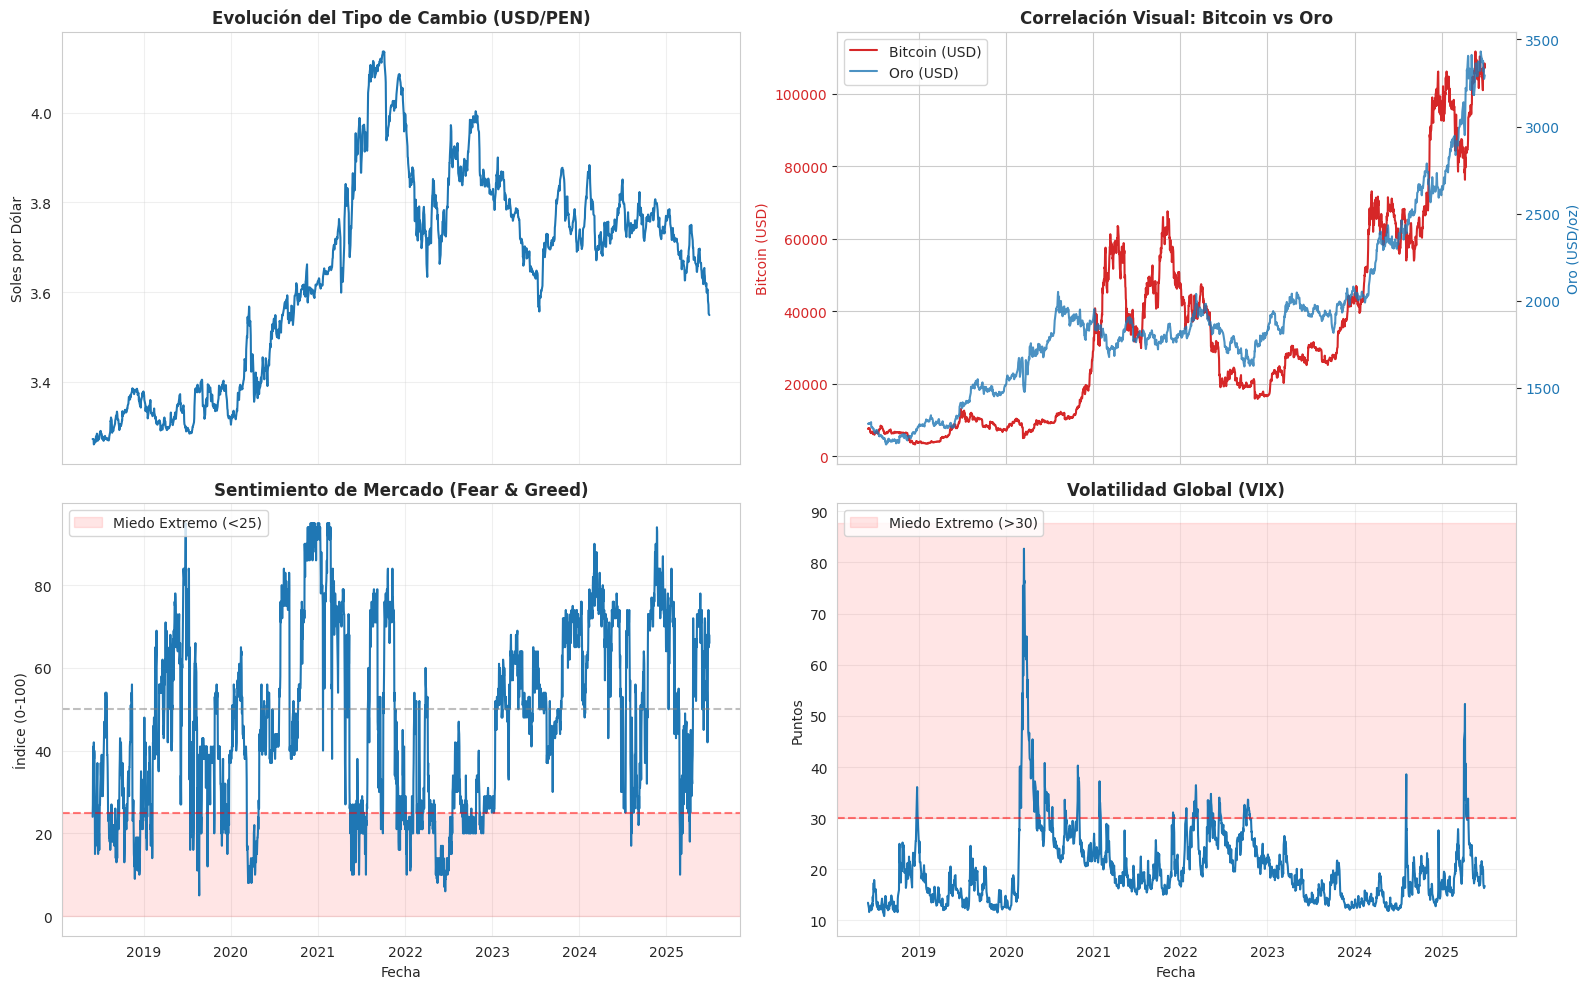

In [2]:
# ============================
# 3.1. Evolución Histórica (Estabilidad vs Volatilidad)
# ============================

# Configuración de la cuadrícula 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
axes = axes.flatten() # Aplanamos para acceder como 0, 1, 2, 3

# --- GRÁFICO 1: Tipo de Cambio
if "USD_PEN_Venta" in dataset.columns:
    sns.lineplot(data=dataset, x=dataset.index, y="USD_PEN_Venta", ax=axes[0], color='tab:blue', linewidth=1.5)
    axes[0].set_title("Evolución del Tipo de Cambio (USD/PEN)", fontsize=12, fontweight='bold')
    axes[0].set_ylabel("Soles por Dólar")
    axes[0].grid(True, alpha=0.3)

# --- GRÁFICO 2: Bitcoin + Oro ---
# Usamos doble eje Y porque las escalas son muy diferentes
if "BTC_USD" in dataset.columns and "Gold" in dataset.columns:
    # 1. Eje Izquierdo: Bitcoin (ROJO)
    sns.lineplot(data=dataset, x=dataset.index, y="BTC_USD", ax=axes[1], color='tab:red', linewidth=1.5, label='Bitcoin (USD)', legend=False)
    axes[1].set_ylabel("Bitcoin (USD)", color='tab:red')
    axes[1].tick_params(axis='y', labelcolor='tab:red')

    # 2. Eje Derecho: Oro (AZUL)
    ax_twin = axes[1].twinx()
    sns.lineplot(data=dataset, x=dataset.index, y="Gold", ax=ax_twin, color='tab:blue', linewidth=1.5, alpha=0.8, label='Oro (USD)', legend=False)
    ax_twin.set_ylabel("Oro (USD/oz)", color='tab:blue')
    ax_twin.tick_params(axis='y', labelcolor='tab:blue')
    ax_twin.grid(False)
    axes[1].set_title("Correlación Visual: Bitcoin vs Oro", fontsize=12, fontweight='bold')

    # 3.  Leyenda Combinada
    lines_1, labels_1 = axes[1].get_legend_handles_labels()
    lines_2, labels_2 = ax_twin.get_legend_handles_labels()
    axes[1].legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# --- GRÁFICO 3: Fear & Greed Index  ---
if "FGI" in dataset.columns:
    sns.lineplot(data=dataset, x=dataset.index, y="FGI", ax=axes[2], color='tab:blue', linewidth=1.5)
    axes[2].set_title("Sentimiento de Mercado (Fear & Greed)", fontsize=12, fontweight='bold')
    axes[2].set_ylabel("Índice (0-100)")
    axes[2].axhline(50, color='grey', linestyle='--', alpha=0.5)

    # ZONA DE MIEDO EXTREMO
    # 1. La franja roja de fondo (0 a 25)
    axes[2].axhspan(0, 25, color='red', alpha=0.1, label='Miedo Extremo (<25)')
    # 2. La línea roja punteada en el límite (25)
    axes[2].axhline(25, color='red', linestyle='--', alpha=0.5)
    axes[2].grid(True, alpha=0.3)
    axes[2].legend(loc='upper left')

# --- GRÁFICO 4: VIX
if "VIX" in dataset.columns:
    sns.lineplot(data=dataset, x=dataset.index, y="VIX", ax=axes[3], color='tab:blue', linewidth=1.5)
    axes[3].set_title("Volatilidad Global (VIX)", fontsize=12, fontweight='bold')
    axes[3].set_ylabel("Puntos")

    # Zona de Miedo Extremo (Valores Altos en VIX, usualmente > 30)
    max_vix = dataset["VIX"].max()
    axes[3].axhspan(30, max_vix + 5, color='red', alpha=0.1, label='Miedo Extremo (>30)')
    axes[3].axhline(30, color='red', linestyle='--', alpha=0.5)

    axes[3].grid(True, alpha=0.3)
    axes[3].legend(loc='upper left')


plt.tight_layout()
plt.show()

**Interpretación:**

La interpretación económica sugiere que mientras el mercado de activos de riesgo, representado por el Bitcoin, y el sentimiento de los inversionistas, capturada por el Fear & Greed Index, se encuentran profundamente acoplados y responden a ciclos globales de liquidez, expectativas y comportamiento, el tipo de cambio USD/PEN se mueve principalmente por factores internos y geopolíticos, mostrando una desconexión significativa respecto al ciclo cripto global.

En la primera gráfica, el Tipo de Cambio USD/PEN exhibe una marcada depreciación del sol peruano entre 2018 y 2021, asociada a episodios de incertidumbre política doméstica y al aumento de la aversión al riesgo durante la pandemia de COVID-19. El máximo cercano a S/ 4.10 en 2021 coincide con un incremento en la prima de riesgo país y con períodos de fuertes salidas de capital. Tras este punto, el tipo de cambio ingresa en una fase de corrección y posterior estabilización, lo que refleja una menor percepción de riesgo político y la intervención activa del Banco Central de Reserva del Perú para contener la volatilidad. En términos macroeconómicos, este comportamiento sugiere que el sol ha logrado mantener una resiliencia relativa en años recientes, anclado en fundamentos locales más que en shocks globales de apetito por riesgo.

El gráfico superior derecho, de la correlación Visual del Bitcoin vs Oro, es particularmente revelador. Las dos series de precios muestran una fuerte correlación visual positiva a lo largo del periodo, especialmente desde 2020. Ambos activos experimentan un fuerte crecimiento, lo que refleja que el Bitcoin no solo es un activo de riesgo especulativo, sino que también está actuando como una reserva de valor o un "oro digital" de alto crecimiento. Ambos suben como respuesta a la masiva liquidez global y a las preocupaciones inflacionarias. Sin embargo, al observar las trayectorias de cerca, se aprecia una distinción fundamental en la volatilidad. Mientras que el Oro (línea azul) presenta una subida con picos y valles más suaves y graduales, el Bitcoin (línea roja) exhibe movimientos mucho más explosivos y erráticos, con caídas y recuperaciones más bruscas. Esta diferencia visual confirma que aunque ambos comparten la misma dirección macroeconómica, el Bitcoin magnifica el riesgo y la volatilidad inherente al ciclo de la liquidez global en comparación con el Oro, que mantiene una trayectoria de activo refugio más estable.

El gráfico inferior izquierdo, del Sentimiento de Mercado (Fear & Greed), muestra el ciclo constante de emociones. La zona sombreada de "Miedo Extremo" (índice $< 25$) resalta los momentos clave donde la psicología del mercado estaba en su punto más bajo. Estos períodos de miedo extremo a menudo coinciden con puntos de inflexión o con oportunidades de compra para activos de riesgo como Bitcoin como se ve a principios de 2020, 2022 y finales de 2023.

Finalmente, el gráfico inferior derecho de la Volatilidad Global (VIX), actúa como el "termómetro del miedo" en los mercados tradicionales. El pico masivo en 2020 (superando los 80 puntos) es la respuesta inmediata al inicio de la pandemia de COVID-19, un evento de pánico sistémico. Desde entonces, el VIX ha permanecido en niveles generalmente bajos, lo que indica un entorno de riesgo estable y baja complacencia en los mercados accionarios globales, a excepción de repuntes moderados en 2022 y un leve aumento a finales de 2025. Es notable que el gran pico del VIX en 2020 coincidió con un período de miedo extremo en el FGI, pero tuvo un impacto mucho menor en la volatilidad diaria del USD/PEN.

La principal conclusión económica que emerge del análisis conjunto es la clara desconexión entre el mercado cambiario peruano y el ciclo especulativo global impulsado por Bitcoin. Mientras el precio del BTC se dispara en 2024–2025, acompañado de fuertes aumentos en la avaricia del mercado, el tipo de cambio USD/PEN se mantiene relativamente estable o incluso muestra una tendencia moderada a la baja. Ello indica que la política monetaria del BCRP, flujos de inversión directa, estabilidad fiscal y términos de intercambio, ejercen una influencia mucho mayor sobre la moneda peruana que la euforia o el pánico en los mercados globales de activos de alto riesgo.

**3.2. Distribuciones de Riesgo (Histogramas)**

En esta sección se analizan las distribuciones de riesgo de los principales activos del dataset mediante el cálculo de retornos diarios. El objetivo es comparar la estabilidad del tipo de cambio USD/PEN frente a la volatilidad inherente de activos financieros como Bitcoin.

Primero, se construyen los retornos porcentuales diarios de ambas series y luego se visualizan mediante histogramas con densidad suavizada. Estos gráficos permiten observar la forma de distribución de cada activo, identificar la presencia de colas pesadas, simetrías o concentraciones de probabilidad, y obtener una primera aproximación sobre su nivel de riesgo.

- Para el tipo de cambio USD/PEN, se busca evidenciar su comportamiento típicamente estable y sus variaciones de baja magnitud.

- Para Bitcoin, se examina una distribución mucho más dispersa debido a su mayor especulación y volatilidad.

El propósito de este apartado es caracterizar el riesgo de los activos antes de realizar modelos predictivos o correlacionales, resaltando las diferencias estructurales en su comportamiento financiero.

/tmp/ipython-input-506151872.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = dataset[cols_retornos].pct_change().dropna()


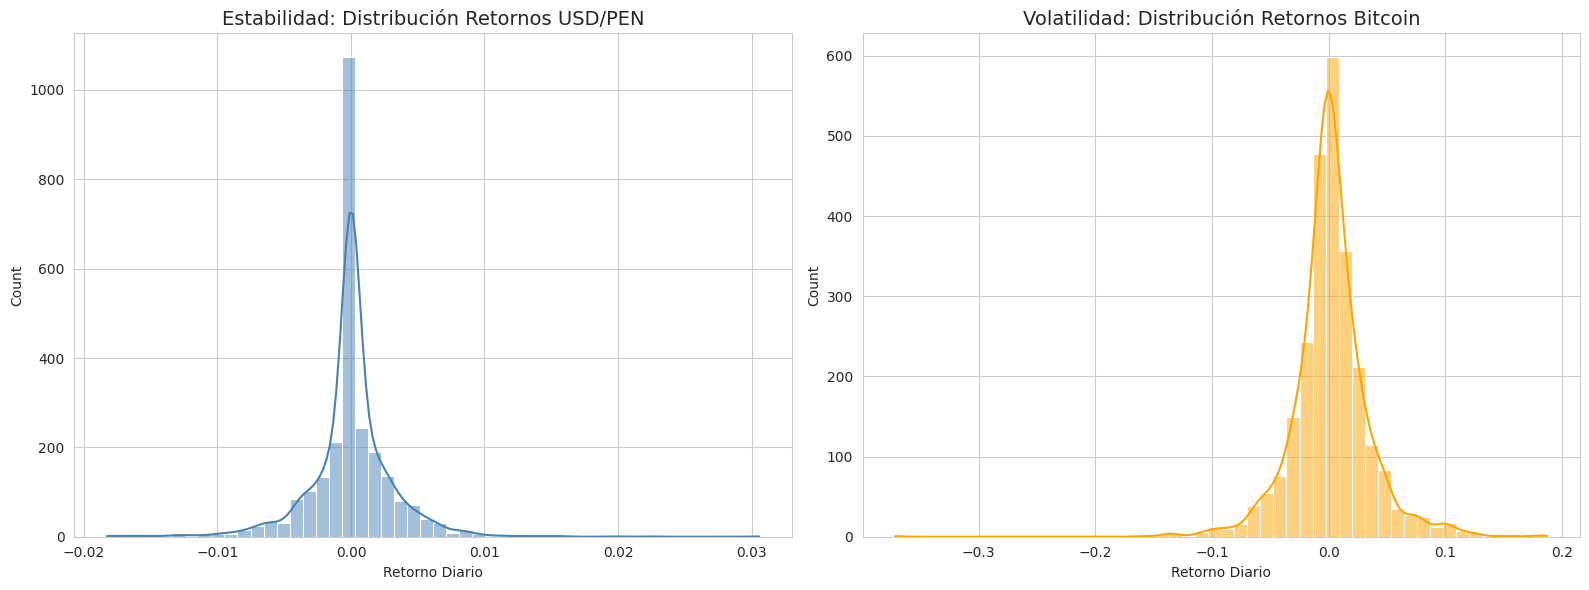

In [3]:
# ============================
# 3.2. Distribuciones de Riesgo (Histogramas)
# ============================
# Calculamos retornos diarios
cols_retornos = [c for c in ["USD_PEN_Venta", "BTC_USD"] if c in dataset.columns]
returns = dataset[cols_retornos].pct_change().dropna()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

if "USD_PEN_Venta" in returns.columns:
    sns.histplot(returns["USD_PEN_Venta"], kde=True, bins=50, color='steelblue', ax=axes[0])
    axes[0].set_title("Estabilidad: Distribución Retornos USD/PEN", fontsize=14)
    axes[0].set_xlabel("Retorno Diario")

if "BTC_USD" in returns.columns:
    sns.histplot(returns["BTC_USD"], kde=True, bins=50, color='orange', ax=axes[1])
    axes[1].set_title("Volatilidad: Distribución Retornos Bitcoin", fontsize=14)
    axes[1].set_xlabel("Retorno Diario")

plt.tight_layout()
plt.show()

**Interpretación:**

La comparación entre la distribución de los retornos diarios del tipo de cambio USD/PEN y del Bitcoin permite observar dos regímenes de volatilidad radicalmente distintos, que reflejan diferencias fundamentales en sus determinantes económicos, su estructura de mercado y su rol dentro del sistema financiero. La principal conclusión es la marcada divergencia entre la estabilidad de una divisa fiduciaria bien gestionada y la volatilidad extrema de un activo digital especulativo.

La distribución de retornos del USD/PEN muestra una curva excepcionalmente estrecha y con un pico muy pronunciado alrededor de cero. Esto significa que la gran mayoría de los movimientos diarios del tipo de cambio son mínimos, típicamente inferiores al 0.5%. Desde un punto de vista económico, esta concentración en torno a la media es indicativa de una baja volatilidad estructural, asociada a un mercado cambiario líquido, predecible y sujeto a un marco institucional sólido. El comportamiento del Sol peruano refleja una combinación de prudencia macroeconómica, un régimen de metas explícitas de inflación y, de manera central, una activa intervención del BCRP en el mercado cambiario.

La presencia de colas delgadas confirma que los shocks extremos son eventos poco frecuentes: cuando ocurren, suelen estar vinculados a episodios puntuales de incertidumbre política o a shocks internacionales, pero aun así permanecen contenidos. En términos de gestión de riesgos, este patrón convierte al USD/PEN en un activo con riesgo operativo muy bajo, apropiado para transacciones cotidianas, contratos financieros y planificación de costos empresariales.

En contraste, la distribución de retornos del Bitcoin exhibe una forma notablemente más ancha, con una dispersión mucho mayor y la presencia de colas gordas. Aunque el retorno promedio también se centra en torno a cero, la amplitud de la curva revela que los movimientos diarios frecuentes oscilan entre ±5%, y que no es inusual observar variaciones superiores al 10% o incluso 15% en una sola sesión. Este patrón caracteriza a Bitcoin como un activo altamente volátil, donde los shocks de precio no son excepcionales sino recurrentes.

Desde una perspectiva económica, esta volatilidad es consistente con la naturaleza especulativa del criptomercado: ausencia de un banco central que estabilice la demanda, baja profundidad de mercado, elevada influencia del ciclo global de liquidez y predominancia de factores conductuales como el miedo, la euforia o eventos de narrativa tecnológica. Esta sensibilidad extrema se encuentra además alineada con lo observado en el Fear & Greed Index, donde los episodios de avaricia extrema y miedo extremo se traducen inmediatamente en grandes movimientos de precios. Bitcoin opera así bajo un régimen de riesgo donde los retornos extraordinarios conviven con pérdidas abruptas, lo que lo convierte en un activo adecuado para inversionistas con tolerancia al riesgo elevada y horizontes especulativos.

En conjunto, la comparación evidencia dos mundos financieros opuestos. El USD/PEN es un instrumento cuya función principal es preservar estabilidad y minimizar sorpresas, integrándose en un marco macroeconómico que prioriza la previsibilidad. Bitcoin, por su parte, es un vehículo que maximiza la exposición al riesgo, caracterizado por una dinámica dominada por shocks frecuentes y amplitud extrema en los retornos. Mientras la estabilidad del sol favorece la planificación económica y la gestión de riesgos, la volatilidad del Bitcoin ofrece oportunidades de altos retornos a costa de enfrentar una probabilidad significativamente mayor de fluctuaciones diarias severas.



**3.3. Gráficos de Dispersión**

En esta sección se construyen diagramas de dispersión con el objetivo de evaluar de manera preliminar la relación entre el tipo de cambio USD/PEN y dos variables clave del análisis: el sentimiento del mercado (FGI) y el precio de Bitcoin.

El propósito es realizar una validación gráfica inicial de nuestras hipótesis descriptivas, antes de pasar a modelos más estructurados.

El objetivo es:

- Visualizar la relación entre el sentimiento global (FGI) y el tipo de cambio peruano.

- Observar cómo se asocia el comportamiento de Bitcoin con el USD/PEN.

- Calcular correlaciones simples para acompañar la inspección visual.

- Identificar posibles patrones lineales, no lineales o ausencia de relación.

Este análisis cumple una función exploratoria que permite identificar si vale la pena profundizar con modelos predictivos o con análisis econométricos más formales sobre estas relaciones.

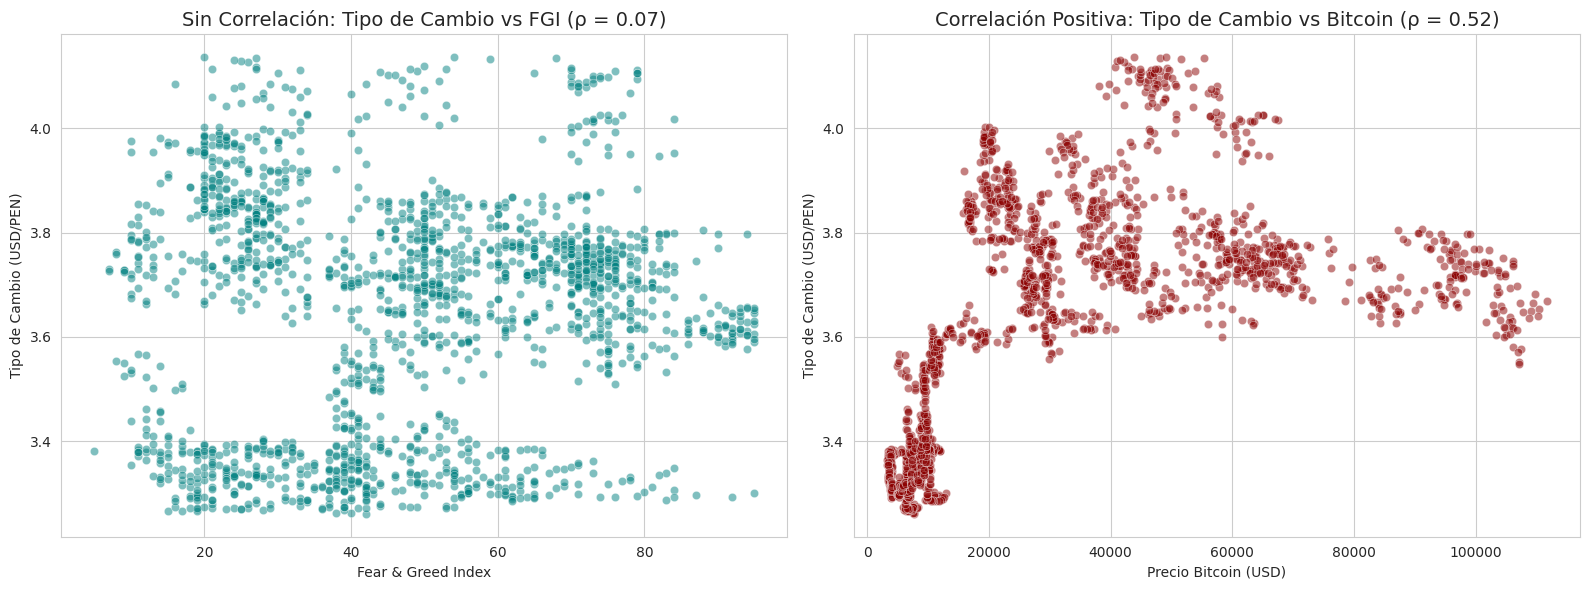

In [4]:
# ============================
# 3.3. Validación de Hipótesis (Scatter Plots)
# ============================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter 1: FGI vs Tipo de Cambio
if "FGI" in dataset.columns and "USD_PEN_Venta" in dataset.columns:
    sns.scatterplot(x=dataset["FGI"], y=dataset["USD_PEN_Venta"], alpha=0.5, color='teal', ax=axes[0])
    corr_fgi = dataset[["USD_PEN_Venta", "FGI"]].corr().iloc[0, 1]
    axes[0].set_title(f"Sin Correlación: Tipo de Cambio vs FGI (ρ = {corr_fgi:.2f})", fontsize=14)
    axes[0].set_xlabel("Fear & Greed Index")
    axes[0].set_ylabel("Tipo de Cambio (USD/PEN)")
    axes[0].grid(True)

# Scatter 2: BTC vs Tipo de Cambio
if "BTC_USD" in dataset.columns and "USD_PEN_Venta" in dataset.columns:
    sns.scatterplot(x=dataset["BTC_USD"], y=dataset["USD_PEN_Venta"], alpha=0.5, color='darkred', ax=axes[1])
    corr_btc = dataset[["USD_PEN_Venta", "BTC_USD"]].corr().iloc[0, 1]
    axes[1].set_title(f"Correlación Positiva: Tipo de Cambio vs Bitcoin (ρ = {corr_btc:.2f})", fontsize=14)
    axes[1].set_xlabel("Precio Bitcoin (USD)")
    axes[1].set_ylabel("Tipo de Cambio (USD/PEN)")
    axes[1].grid(True)

plt.tight_layout()
plt.show()

**Interpretación:**
- El gráfico de la izquierda, muestra la dispersión de los puntos de datos entre las variables de el Tipo de Cambio (eje Y) y el índice de Sentimiento (eje X). Con un coeficiente de correlación de Pearson ($\rho$) extremadamente bajo y cercano a cero (0.07), la gráfica confirma que no existe una relación lineal significativa entre el sentimiento de los inversores de activos de riesgo (miedo/avaricia) y el valor del Sol peruano. La nube de puntos es dispersa, sin un patrón ascendente o descendente definido. Esto refuerza la idea de que los factores que impulsan las fluctuaciones del Sol son intrínsecos a la economía peruana como la política fiscal, flujos de inversión, política del BCRP, y están aislados de la euforia o el pánico en los mercados de criptomonedas.

- Por otro lado, el gráfico de la derecha presenta la relación entre ls variables de el Tipo de Cambio (eje Y) y el Precio de Bitcoin (eje X). El coeficiente de correlación de 0.52 indica una correlación positiva moderada a fuerte entre ambas variables. Visualmente, se aprecia un patrón donde, a medida que el precio de Bitcoin aumenta, el tipo de cambio USD/PEN tiende a aumentar también, moviéndose hacia arriba, lo que implica una depreciación del Sol.

- La correlación positiva entre USD/PEN y Bitcoin (un activo de riesgo y especulativo) es contraintuitiva y tiene importantes implicaciones económicas. En condiciones normales, el tipo de cambio de una moneda de mercado emergente a menudo exhibe una correlación negativa con los activos de riesgo globales, ya que cuando el riesgo sube, el dólar se deprecia globalmente, lo que favorece a las emergentes. Sin embargo, esta correlación positiva moderada de 0.52 sugiere una de dos cosas:

1. Un reflejo de Inestabilidad Pasada, es decir, que gran parte de la historia de los datos está dominada por el periodo 2020-2021, donde ambos activos subieron fuertemente: Bitcoin por su rally global, y el USD/PEN por la incertidumbre política local. Este período de convergencia podría estar elevando la correlación histórica.
2. La correlación podría reflejar una tendencia estructural: cuando hay una mayor demanda por activos de riesgo, como Bitcoin, que requieren la conversión a dólares para su compra, esto podría ejercer una ligera presión al alza sobre el USD/PEN, depreciando el Sol.

**3.4. Mapa de Calor de Correlaciones**

En esta sección se construye una matriz de correlaciones entre todas las variables numéricas del dataset, con el objetivo de identificar relaciones lineales simples que puedan ser relevantes para el análisis posterior.

🔹 Objetivos
  - Obtener una visión global de las relaciones entre indicadores financieros, de mercado y de sentimiento.
  - Detectar pares de variables que presentan correlaciones altas (positivas o negativas).
  - Identificar variables que parecen no tener asociación lineal, lo cual orienta el análisis posterior.
  - Verificar si existen redundancias o asociaciones que puedan influir en modelos predictivos.

Para ello se utiliza un gradiente de color que facilita la identificación de relaciones fuertes o débiles.

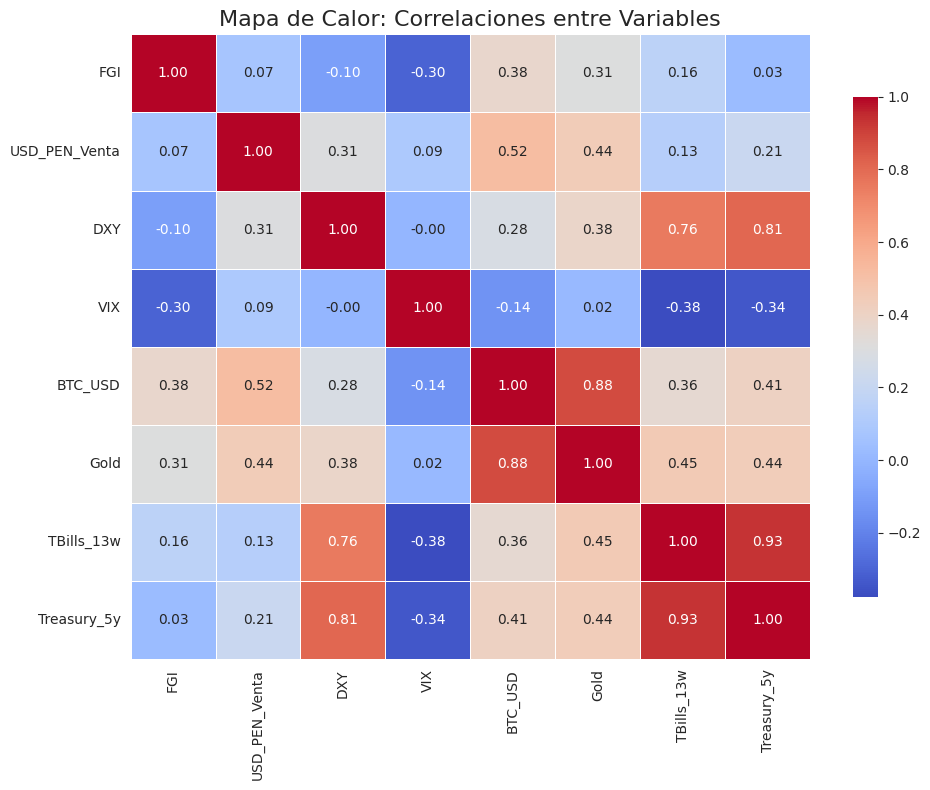

In [5]:
# ============================
# 3.4. Mapa de Calor de Correlaciones
# ============================
plt.figure(figsize=(10, 8))
# Filtramos solo columnas numéricas para evitar errores de correlación
numeric_dataset = dataset.select_dtypes(include=[np.number])
corr_matrix = numeric_dataset.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Mapa de Calor: Correlaciones entre Variables', fontsize=16)
plt.tight_layout()
plt.show()

**Interpretación:**
- Las correlaciones extremadamente altas entre DXY y las tasas (TBills_13w y Treasury_5y) indican que los movimientos del dólar responden principalmente a cambios en la política monetaria de EE.UU. y al apetito global por activos seguros.

- El tipo de cambio USD/PEN está influido por factores externos más que por condiciones financieras globales agregadas. Su correlación moderada con DXY, oro y Bitcoin muestra que el sol peruano se deprecia generalmente en episodios de fortalecimiento del dólar y búsqueda de refugio, pero casi no responde al índice global FGI.

- Bitcoin y el oro se comportan de manera muy similar en la muestra. La correlación de 0.88 sugiere que ambos actúan como activos alternativos frente al riesgo global, aunque no necesariamente como refugios perfectos, pues su relación con el VIX es baja. Funcionan más como activos especulativos globales con sensibilidad común.

- El VIX mantiene una relación negativa con el FGI, confirmando que la mayor volatilidad e incertidumbre se asocia con deterioro en las condiciones financieras. Sin embargo, su baja correlación con Bitcoin y el oro indica que estos activos no reaccionan fuertemente a episodios de estrés financiero tradicional.

- El FGI mantiene correlaciones positivas moderadas con Bitcoin y el oro, lo que sugiere que las condiciones financieras globales favorables suelen coincidir con aumentos en estos activos, aunque su relación no es suficientemente fuerte como para considerarlos totalmente sincronizados con el ciclo financiero mundial.

**3.5. Bimodalidad del Índice de Sentimiento (Clasificación del FGI)**

En este apartado se analiza la distribución del Fear & Greed Index (FGI) clasificándolo en categorías cualitativas ampliamente utilizadas en el análisis de criptomercados y activos de riesgo. El propósito es observar cómo se reparte el sentimiento del mercado a lo largo del periodo estudiado y determinar si existe predominio de estados extremos o moderados.

🔹 Objetivos

   - Convertir el indicador FGI (0–100) en categorías interpretables:
Extreme Fear, Fear, Neutral, Greed y Extreme Greed.
   - Examinar la frecuencia de ocurrencia de cada tipo de sentimiento.
   - Evaluar si la distribución sugiere comportamientos agrupados o cambios bruscos en el ánimo del mercado.
   - Generar una visualización que facilite comprender la dinámica psicológica del mercado durante el periodo.

Este análisis permite observar la estructura general del sentimiento del mercado y sirve como insumo descriptivo antes de evaluar su posible relación con el tipo de cambio.

/tmp/ipython-input-4198606100.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fgi_counts.index, y=fgi_counts.values, palette=colors)


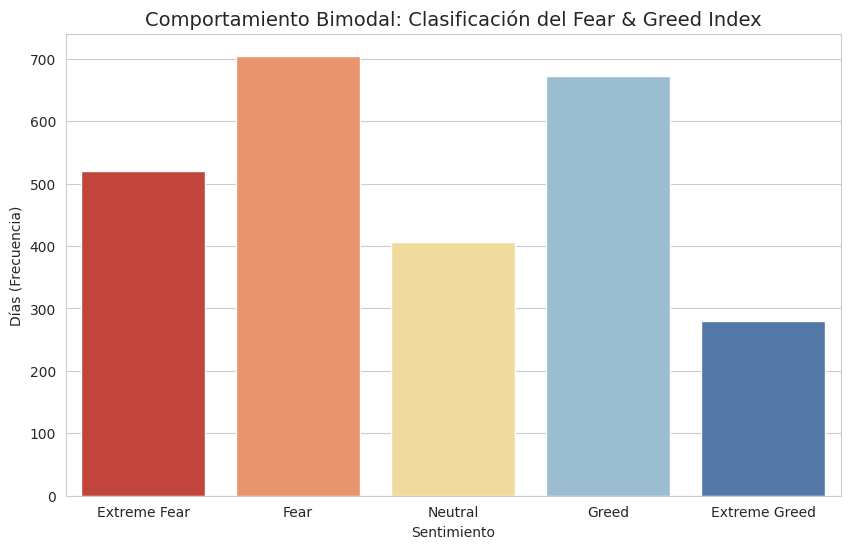

In [6]:
# ============================
# 3.5. La Bimodalidad del Sentimiento
# ============================
if "FGI" in dataset.columns:
    def clasificar_fgi(valor):
        if valor <= 25: return "Extreme Fear"
        elif valor <= 45: return "Fear"
        elif valor <= 55: return "Neutral"
        elif valor <= 75: return "Greed"
        else: return "Extreme Greed"

    fgi_counts = dataset['FGI'].dropna().apply(clasificar_fgi).value_counts()

    order = ["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"]
    fgi_counts = fgi_counts.reindex(order).fillna(0) # fillna por si falta alguna categoría

    colors = ["#d73027", "#fc8d59", "#fee090", "#91bfdb", "#4575b4"]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=fgi_counts.index, y=fgi_counts.values, palette=colors)
    plt.title("Comportamiento Bimodal: Clasificación del Fear & Greed Index", fontsize=14)
    plt.xlabel("Sentimiento")
    plt.ylabel("Días (Frecuencia)")
    plt.show()

**Interpretación:**

El gráfico revela que la distribución del sentimiento del mercado no es uniforme ni centrada en estados de neutralidad. Por el contrario, presenta un comportamiento marcadamente bimodal, donde se observan dos picos principales en los extremos emocionales del mercado: el miedo y la avaricia. Este patrón muestra que los inversionistas rara vez permanecen en un estado de equilibrio; más bien, el mercado oscila entre episodios de fuerte aversión al riesgo y momentos de alta apetencia por activos especulativos.

El primer pico, correspondiente a las categorías de “Fear” y “Extreme Fear”, es el más pronunciado. Estas dos categorías acumulan más de 1200 días, lo que evidencia que los mercados pasan más tiempo en estados de preocupación, cautela o incluso pánico. Este predominio del miedo sugiere que las fases de corrección, consolidación y búsqueda de refugio suelen ser más prolongadas y frecuentes que los episodios de euforia. Desde una perspectiva económica, esto refleja la naturaleza asimétrica del riesgo, donde las malas noticias tienden a generar respuestas más intensas y duraderas que las buenas noticias.

El segundo pico, aunque menos dominante, se presenta en las categorías “Greed” y “Extreme Greed”, que juntas suman alrededor de 950 días. Este lado de la distribución refleja los momentos de mayor expansión especulativa, donde los inversionistas muestran apetito por activos de alto riesgo y adoptan posturas más agresivas. La menor duración de estos períodos en comparación con los estados de miedo concuerda con la dinámica típica de los ciclos financieros, donde los mercados alcistas suelen ser más rápidos e impulsivos, mientras que las etapas bajistas o de corrección son más prolongadas.

La categoría “Neutral”, por su parte, es la menos frecuente y representa apenas unos 400 días. Esto confirma que los mercados rara vez se encuentran en un estado de racionalidad o estabilidad emocional. La psicología colectiva del inversionista se muestra altamente volátil, propensa a transiciones abruptas entre euforia y temor.

Desde una perspectiva económica, este comportamiento bimodal se conecta con los resultados observados en los gráficos de evolución del Bitcoin y del tipo de cambio USD/PEN. Mientras los activos altamente especulativos como BTC tienden a amplificar los ciclos de avaricia y miedo, una relación evidenciada por la alta correlación entre Bitcoin y el sentimiento, los activos más estables como el tipo de cambio peruano, muestran una mayor desconexión frente a estas oscilaciones emocionales globales. El Sol peruano, por ejemplo, responde más a factores internos y política monetaria que a los picos de euforia o pánico del mercado global.

## **TRABAJO 2 - PRINCIPALES RESULTADOS**

# **4. Modelo Dinámico ARX (Autoregresivo con Variable Exógena)**

En esta sección se implementa un modelo ARX(1) para evaluar si el retorno del tipo de cambio (USD/PEN) puede ser explicado por su propio rezago (estructura autoregresiva), y el rezago del Fear & Greed Index (FGI) como shock externo potencial.

El objetivo es probar si el sentimiento global respecto a activos de riesgo aporta información predictiva adicional más allá de la inercia propia de la serie del tipo de cambio.

🔹 Objetivos:

- Construir retornos del tipo de cambio en log-diferencias.

- Generar rezagos del retorno y del FGI para capturar relaciones dinámicas.

- Ajustar un modelo autoregresivo con regresor exógeno utilizando OLS con errores HAC, apropiado para series temporales.

- Separar el dataset en entrenamiento y prueba para evaluar capacidad predictiva.

- Comparar el desempeño (MSE) contra el modelo simple realizado en el trabajo 2.

🔹 Procedimiento

1. Construcción de la variable dependiente: Se calcula el retorno diario del tipo de cambio en log-diferencias y se asegura que esté disponible en el dataset.

2. Generación de rezagos:

- ret_USD_lag1: captura persistencia del tipo de cambio.

- FGI_lag1: incorpora el sentimiento del mercado como variable exógena.

3. Limpieza del dataset:
Se eliminan filas con valores faltantes generados por los rezagos.

4. Definición de variables y partición temporal:
Se estructura el conjunto X (regresores) y y (retorno), con un split 75% train / 25% test respetando el orden temporal.

5. Estimación del modelo ARX:
Se ajusta un modelo OLS con: constante explícita, y errores HAC para corregir autocorrelación.

6. Evaluación predictiva:

- Se generan predicciones sobre el conjunto de prueba.

- Se calcula el MSE como métrica principal para evaluar qué tan bien el modelo extrapola.

Este apartado permite evaluar si el tipo de cambio presenta memoria estadística y si el FGI añade valor predictivo en una estructura dinámica. El modelo ARX sirve como puente entre la parte econométrica clásica y los modelos más flexibles de machine learning utilizados posteriormente.

In [7]:
# ============================
# 4: Modelo Dinámico (ARX) - Tabla Estadística + MSE
# ============================
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

# Aseguramos que 'ret_USD' exista en el dataset principal
if 'ret_USD' not in dataset.columns:
    dataset['ret_USD'] = np.log(dataset['USD_PEN_Venta']).diff() * 100

# 1. Feature Engineering
# Aseguramos que existan los rezagos
dataset['ret_USD_lag1'] = dataset['ret_USD'].shift(1)
dataset['FGI_lag1'] = dataset['FGI'].shift(1)

# Limpieza de NaNs
df_dynamic = dataset.dropna(subset=['ret_USD', 'FGI_lag1', 'ret_USD_lag1']).copy()

# 2. Definición de Variables
X_dynamic = df_dynamic[['FGI_lag1', 'ret_USD_lag1']]
y_dynamic = df_dynamic['ret_USD']

# 3. Split Train/Test (75% Train)
split_idx_dyn = int(len(df_dynamic) * 0.75)

X_train_dyn = X_dynamic.iloc[:split_idx_dyn]
y_train_dyn = y_dynamic.iloc[:split_idx_dyn]

X_test_dyn = X_dynamic.iloc[split_idx_dyn:]
y_test_dyn = y_dynamic.iloc[split_idx_dyn:]

# 4. Ajuste con Statsmodels (OLS) en TRAIN
# IMPORTANTE: statsmodels requiere agregar la constante manualmente
X_train_dyn_sm = sm.add_constant(X_train_dyn)

# Ajustamos el modelo (Training)
model_arx_sm = sm.OLS(y_train_dyn, X_train_dyn_sm).fit(cov_type='HAC', cov_kwds={'maxlags':5})

# --- NUEVO: CÁLCULO DEL MSE EN TEST ---
# Para predecir con statsmodels, también debemos agregar la constante a los datos de TEST
X_test_dyn_sm = sm.add_constant(X_test_dyn)

# Hacemos la predicción
y_pred_dyn = model_arx_sm.predict(X_test_dyn_sm)

# Calculamos el MSE
mse_test_arx = mean_squared_error(y_test_dyn, y_pred_dyn)

# 5. Mostrar Resultados Combinados
print("\n--- RESUMEN ESTADÍSTICO DEL MODELO DINÁMICO (ARX) ---")
print(model_arx_sm.summary())

print("\n" + "="*60)
print(f" METRICAS DE PREDICCIÓN (TEST SET) ")
print("="*60)
print(f"MSE (Error Cuadrático Medio): {mse_test_arx:.6f}")
print("="*60)

# Explicación rápida
print("\n--- GUÍA DE INTERPRETACIÓN ---")
print("1. MSE: Cuanto más bajo, mejor predicción (Comparar con 0.101 del modelo simple).")
print("2. P>|z| (ret_USD_lag1): Si es < 0.05, confirma que el mercado tiene 'memoria'.")
print("3. P>|z| (FGI_lag1): Si es > 0.05, confirma que el sentimiento NO afecta.")



--- RESUMEN ESTADÍSTICO DEL MODELO DINÁMICO (ARX) ---
                            OLS Regression Results                            
Dep. Variable:                ret_USD   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.147
Date:                Sat, 29 Nov 2025   Prob (F-statistic):            0.00603
Time:                        09:00:19   Log-Likelihood:                -333.41
No. Observations:                 747   AIC:                             672.8
Df Residuals:                     744   BIC:                             686.7
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

**Interpretación:**

El modelo dinámico (ARX) estimado para explicar los retornos del tipo de cambio USD/PEN muestra que la única variable con poder explicativo significativo es el propio retorno rezagado del tipo de cambio. El coeficiente de ret_USD_lag1 es positivo y altamente significativo (p = 0.002), lo que indica que existe un grado de persistencia en los movimientos diarios del dólar: cuando el USD/PEN sube un día, es ligeramente más probable que vuelva a subir al día siguiente. Esto confirma que, en el corto plazo, el mercado cambiario peruano presenta un comportamiento con “memoria” o inercia, típico de series financieras con microestructura activa, costos de ajuste, formación gradual de expectativas o en este caso intervenciones del BCRP.

Por otro lado, el coeficiente del FGI rezagado no es significativo (p = 0.623), lo que implica que las condiciones financieras globales no tienen un efecto inmediato sobre la variación diaria del tipo de cambio una vez controlada la dinámica propia de la serie. Esto refuerza la idea de que los shocks internacionales pueden afectar el nivel del tipo de cambio en horizontes mayores, pero no explican bien su variación diaria. Este resultado es coherente con países donde la política monetaria local es activa y el banco central interviene.

En cuanto a la constante tampoco es significativa, lo cual es consistente con que los retornos cambiarios no presentan una tendencia sistemática.

En términos de ajuste, el R² de 0.031 indica que el modelo explica solo una pequeña fracción de la variabilidad diaria del tipo de cambio, algo habitual en retornos financieros, donde los movimientos están dominados por ruido y shocks de alta frecuencia. No obstante, el modelo sí es globalmente significativo (F-test p = 0.006), lo que confirma que la inclusión del componente autorregresivo aporta información estadísticamente relevante. El resultado es coherente con que las series de retornos suelen ser difíciles de predecir pero pueden presentar una ligera autocorrelación.

Finalmente, el MSE del test (0.092) es menor que el del modelo simple (0.101), lo que muestra una mejora en capacidad predictiva al incluir la dinámica propia de la serie. En conjunto, el modelo revela que el comportamiento del dólar en Perú responde principalmente a su propia inercia de corto plazo y que las condiciones globales no influyen significativamente en la variación diaria del tipo de cambio dentro de este horizonte.


# **TRABAJO 3 - PRINCIPALES RESULTADOS**

# **5. Etapa de Modelado Avanzado (Regresión)**

**Objetivo General**

En esta sección implementamos modelos de regresión más avanzados para predecir el retorno del tipo de cambio (ret_USD). El objetivo es evaluar si modelos con mayor capacidad predictiva (Ridge, Random Forest y XGBoost) pueden capturar correctamente la dinámica del mercado utilizando rezagos y variables exógenas.

**5.1. Preparación y Ampliación del Dataset (Feature Engineering)**

En esta etapa se amplía el dataset original generando características adicionales que capturan patrones temporales. Se realizan estas transformaciones:

- Cálculo del retorno del tipo de cambio (ret_USD) si aún no está en el dataset.

- Generación de rezagos de variables relevantes (USD_PEN_Venta, BTC_USD, FGI, y variables macro si están disponibles). Los rezagos utilizados son:
  - t−1 → memoria inmediata
  - t−2 → persistencia de corto plazo
  - t−7 → dinámica semanal

- Se eliminan las filas con valores perdidos generados por los rezagos.

- Se construye la matriz final de features excluyendo columnas en nivel para evitar fugas de información.

El objetivo es crear un conjunto robusto de predictores que permita capturar dinámicas temporales y relaciones no lineales potenciales.

In [8]:
# ============================
# 5.1. MODELADO AVANZADO (REGRESIÓN)
# ============================
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Verificación de XGBoost
try:
    from xgboost import XGBRegressor
    XGB_AVAILABLE = True
except ImportError:
    XGB_AVAILABLE = False
    print("⚠️ XGBoost no está instalado. Se omitirá este modelo.")

print("\n" + "="*60)
print(" INICIANDO ETAPA DE REGRESIÓN: RIDGE, RF & XGBOOST ")
print("="*60)

# -----------------------------------------------------------------------------
# 5.1. Feature Engineering (Ampliación para modelos complejos)
# -----------------------------------------------------------------------------
# Trabajamos sobre una copia para no afectar el dataset original
df_model = dataset.copy()

# Calculamos retornos si no existen
if 'ret_USD' not in df_model.columns:
    df_model['ret_USD'] = np.log(df_model['USD_PEN_Venta']).diff() * 100

# Variables a rezagar (Lags: t-1, t-2, t-7) para capturar memoria corta y semanal
vars_to_lag = ['USD_PEN_Venta', 'BTC_USD', 'FGI']
# Añadimos variables macro si existen en tu dataset final
for extra in ['DXY', 'VIX', 'Gold', 'TBills_13w', 'Treasury_5y']:
    if extra in df_model.columns:
        vars_to_lag.append(extra)

lags = [1, 2, 7]
for col in vars_to_lag:
    if col in df_model.columns:
        for l in lags:
            df_model[f'{col}_lag{l}'] = df_model[col].shift(l)

# Limpieza Final para Modelado
# Eliminamos filas con NaNs generados por los lags
df_model.dropna(inplace=True)

# Definición de Target y Features
target = 'ret_USD'
# Excluimos el target y variables en nivel (usamos lags y variaciones) para evitar bias
drop_cols = [target, 'USD_PEN_Venta', 'classification']
features = [c for c in df_model.columns if c not in drop_cols and 'lag' in c]

X = df_model[features]
y = df_model[target]

print(f"Features seleccionadas ({len(features)}):")
print(features)


 INICIANDO ETAPA DE REGRESIÓN: RIDGE, RF & XGBOOST 
Features seleccionadas (25):
['ret_USD_lag1', 'FGI_lag1', 'USD_PEN_Venta_lag1', 'USD_PEN_Venta_lag2', 'USD_PEN_Venta_lag7', 'BTC_USD_lag1', 'BTC_USD_lag2', 'BTC_USD_lag7', 'FGI_lag2', 'FGI_lag7', 'DXY_lag1', 'DXY_lag2', 'DXY_lag7', 'VIX_lag1', 'VIX_lag2', 'VIX_lag7', 'Gold_lag1', 'Gold_lag2', 'Gold_lag7', 'TBills_13w_lag1', 'TBills_13w_lag2', 'TBills_13w_lag7', 'Treasury_5y_lag1', 'Treasury_5y_lag2', 'Treasury_5y_lag7']


**5.2. Configuración de Entrenamiento con TimeSeriesSplit**

Usamos validación cruzada especial para series de tiempo.
Se implementa:

- Hold–out final del último 10 % de datos, usado solo para el test final.

- TimeSeriesSplit con 5 particiones y gap=1 para evitar dependencia inmediata entre train y validación.

El objetivo es dividir los datos respetando la estructura temporal y evitar sobreajuste.

In [9]:
# -----------------------------------------------------------------------------
# 5.2. Configuración de Validación Temporal (MEJORA CLAVE DOCENTE)
# -----------------------------------------------------------------------------
# Hold-out final: Últimos 10% de datos para test puro
test_size_final = int(len(X) * 0.10)
X_train_full = X.iloc[:-test_size_final]
y_train_full = y.iloc[:-test_size_final]
X_test_final = X.iloc[-test_size_final:]
y_test_final = y.iloc[-test_size_final:]

# TimeSeriesSplit MEJORADO:
# - gap=1: Deja un día de espacio entre train y validación para evitar correlación inmediata excesiva
# - test_size: Define un tamaño fijo de ventana de validación
tscv = TimeSeriesSplit(n_splits=5, gap=1, test_size=50)

print(f"\nDatos de Entrenamiento: {X_train_full.shape[0]} muestras")
print(f"Datos de Test Final: {X_test_final.shape[0]} muestras")


Datos de Entrenamiento: 780 muestras
Datos de Test Final: 86 muestras


**5.3. Modelo Ridge Regression (Regularización L2)**

En este bloque:

- Se estandarizan los datos (requisito para Ridge).

- Se realiza búsqueda del hiperparámetro alpha usando RidgeCV con validación temporal.

- Se generan predicciones sobre el test final.

- Se calcula el MSE, que sirve como métrica comparativa.

El objetivo es evaluar un modelo lineal regularizado capaz de manejar multicolinealidad generada por los rezagos.

In [10]:
# -----------------------------------------------------------------------------
# 5.3. Modelado: Ridge (Con CV Anidado)
# -----------------------------------------------------------------------------
print("\n--- Entrenando RIDGE ---")
# Estandarización es vital para Ridge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_final)

# RidgeCV con tscv anidado (Mejora solicitada)
# Al pasar 'cv=tscv', la búsqueda del alpha respeta el orden temporal
alphas = np.logspace(-3, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=tscv, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train_full)

print(f"Mejor Alpha Ridge: {ridge_cv.alpha_:.4f}")
pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test_final, pred_ridge)


--- Entrenando RIDGE ---
Mejor Alpha Ridge: 1000.0000


**5.4. Modelo Random Forest Regression**

En esta sección:

- Se entrena un modelo RF que puede capturar no linealidades y relaciones complejas.

- Se utiliza un GridSearchCV con TimeSeriesSplit, manteniendo el orden temporal.

- Se selecciona el mejor conjunto de hiperparámetros.

- Se calcula el MSE en el test final.

El objetivo es evaluar un modelo flexible que aprenda interacciones y no linealidades entre las variables rezagadas.

In [11]:
# -----------------------------------------------------------------------------
# 5.4. Modelado: Random Forest
# -----------------------------------------------------------------------------
print("\n--- Entrenando RANDOM FOREST ---")
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 4]
}

# GridSearch respetando tiempo con tscv
grid_rf = GridSearchCV(rf, param_grid_rf, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_full, y_train_full)

best_rf = grid_rf.best_estimator_
print(f"Mejores Params RF: {grid_rf.best_params_}")
pred_rf = best_rf.predict(X_test_final)
mse_rf = mean_squared_error(y_test_final, pred_rf)


--- Entrenando RANDOM FOREST ---
Mejores Params RF: {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 200}


**5.5 Modelo XGBoost**

En este bloque:

- Se configura una búsqueda de hiperparámetros para XGBoost.

- Se entrena el modelo respetando validación temporal.

- Se genera el MSE de prueba.

El objetivo es probar un modelo basado en boosting que captura patrones más complejos en series financieras.

In [12]:
# -----------------------------------------------------------------------------
# 5.5. Modelado: XGBoost (Opcional)
# -----------------------------------------------------------------------------
mse_xgb = None
pred_xgb = None
if XGB_AVAILABLE:
    print("\n--- Entrenando XGBOOST ---")
    xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

    param_grid_xgb = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8]
    }

    grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_xgb.fit(X_train_full, y_train_full)

    best_xgb = grid_xgb.best_estimator_
    print(f"Mejores Params XGB: {grid_xgb.best_params_}")
    pred_xgb = best_xgb.predict(X_test_final)
    mse_xgb = mean_squared_error(y_test_final, pred_xgb)


--- Entrenando XGBOOST ---
Mejores Params XGB: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


**5.6. Comparación Final de Modelos (MSE)**

Se crea una tabla resumen con los valores de MSE:

- Ridge

- Random Forest

- XGBoost

El objetivo es comparar objetivamente el desempeño predictivo de cada modelo usando el mismo periodo de prueba.

In [13]:
# -----------------------------------------------------------------------------
# 5.6. Comparativa Final y Gráficos
# -----------------------------------------------------------------------------
resultados = {
    'Modelo': ['Ridge', 'Random Forest'],
    'MSE Test': [mse_ridge, mse_rf]
}
if XGB_AVAILABLE:
    resultados['Modelo'].append('XGBoost')
    resultados['MSE Test'].append(mse_xgb)

df_res = pd.DataFrame(resultados)
print("\n" + "="*40)
print(" RESULTADOS FINALES (MSE) ")
print("="*40)
print(df_res)
print("="*40)


 RESULTADOS FINALES (MSE) 
          Modelo  MSE Test
0          Ridge  0.074256
1  Random Forest  0.076369
2        XGBoost  0.074090


**Interpretación:**

Los resultados muestran que los tres modelos, Ridge, Random Forest y XGBoost, obtienen desempeños muy similares en la predicción de los retornos diarios del tipo de cambio USD/PEN. Sin embargo, XGBoost presenta el menor MSE (0.07409), seguido muy de cerca por Ridge (0.07426) y, en último lugar, Random Forest (0.07637). Esto indica que, dentro de la ligera variación observada, XGBoost es el modelo que mejor logra capturar la relación entre el índice de sentimiento de miedo y avaricia del mercado cripto y las fluctuaciones del tipo de cambio del sol peruano.

Desde una perspectiva económica, el hecho de que Ridge (un modelo lineal penalizado) y XGBoost (un modelo no lineal altamente flexible) tengan prácticamente el mismo nivel de error sugiere que la serie de retornos del USD/PEN no contiene patrones no lineales complejos que puedan ser explotados para predecirla. Es decir, los retornos diarios del dólar en Perú se comportan de manera altamente aleatoria, con poca estructura aprovechable más allá de una leve persistencia capturada por modelos sencillos. Esto es consistente con la dinámica del USD/PEN: un mercado relativamente líquido, con intervención estabilizadora del BCRP, que reduce patrones aprovechables al suavizar la volatilidad intradía, y con movimientos diarios dominados por shocks pequeños y ruido, más que por patrones persistentes o no lineales pronunciados.

Asimismo, que el Random Forest, un modelo que detecta interacciones y no linealidades, no supere al Ridge confirma que el tipo de cambio opera bajo un régimen de estabilidad donde las variaciones diarias responden mayormente a ruido y shocks menores, no a dinámicas estructurales detectables por modelos complejos.

En conjunto, el resultado más relevante es que ningún modelo reduce el error predictivo de manera sustancial, lo que sugiere que la predictibilidad del USD/PEN en el muy corto plazo es limitada. Modelos sofisticados (XGBoost o Random Forest) no ofrecen una ventaja clara sobre modelos lineales simples, lo que coincide con la hipótesis eficiente para mercados con fuerte presencia de banca central: la mayor parte de la variación diaria es ruido, no información aprovechable. Este hallazgo refuerza la conclusión general de nuestra investigación, el tipo de cambio peruano es un activo de baja volatilidad y difícil predicción, dominado por microfluctuaciones y no por el sentimiento global o tendencias especulativas.

**7. Importancia de Variables (Random Forest)**

Se calcula la importancia relativa de los predictores y se grafica el “Top 10”.

El objetivo es identificar qué variables rezagadas o exógenas tienen mayor peso en la predicción del retorno del tipo de cambio.

/tmp/ipython-input-2857942484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=importances.values, y=importances.index, palette='viridis')


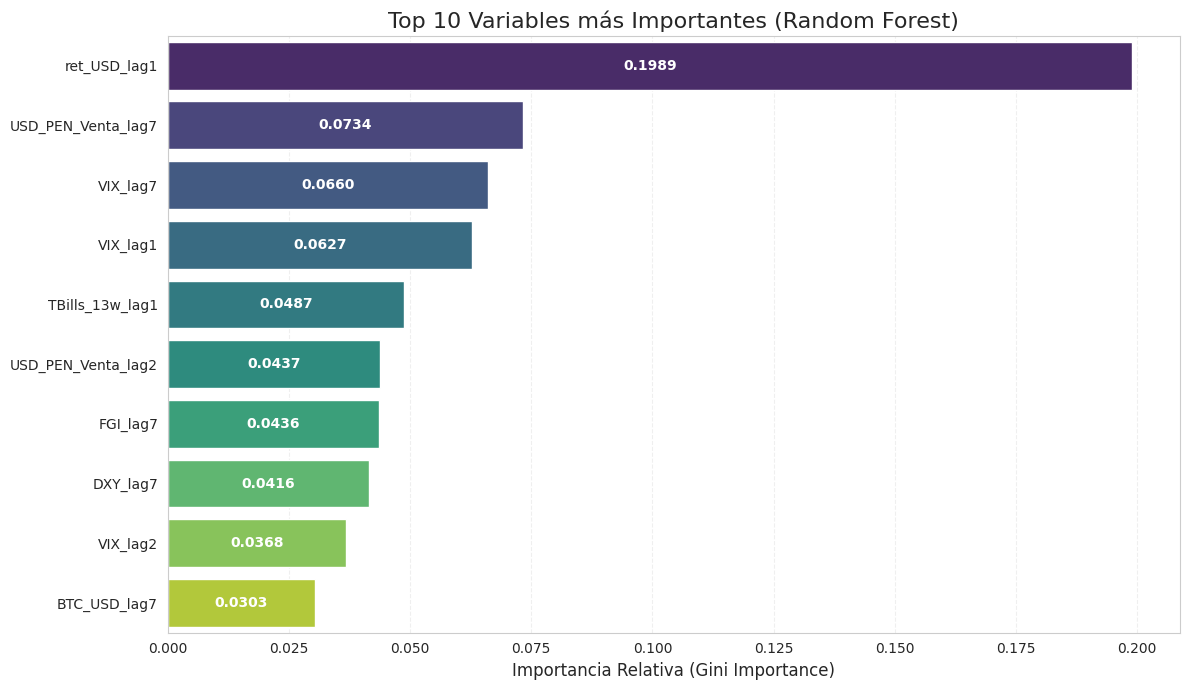

In [14]:
# ==============================================================================
# 5.7. GRÁFICO: IMPORTANCIA DE VARIABLES
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 7))

# 1. Calcular y ordenar las 10 variables más importantes
importances = pd.Series(best_rf.feature_importances_, index=features).sort_values(ascending=False).head(10)

# 2. Crear el gráfico de barras y capturar el objeto "ax" (ejes)
# Usamos la paleta 'viridis' que va de morado (oscuro) a amarillo (claro)
ax = sns.barplot(x=importances.values, y=importances.index, palette='viridis')

# 3. Añadir los valores numéricos DENTRO de cada barra
# label_type='center' pone el texto en medio de la barra.
# fmt='%.4f' muestra 4 decimales.
for container in ax.containers:
    ax.bar_label(container,
                 fmt='%.4f',           # Formato: 4 decimales
                 label_type='center',  # Posición: Centro de la barra
                 color='white',        # Color del texto (blanco resalta en viridis)
                 weight='bold',        # Negrita para mejor lectura
                 fontsize=10)

# 4. Estética final
plt.title("Top 10 Variables más Importantes (Random Forest)", fontsize=16)
plt.xlabel("Importancia Relativa (Gini Importance)", fontsize=12)
plt.ylabel(None) # Quitamos la etiqueta 'y' innecesaria
plt.grid(True, axis='x', linestyle='--', alpha=0.3) # Grid suave solo vertical
plt.tight_layout()
plt.show()

**Interpretación:**

El resultado más destacado es que ret_USD_lag1, es decir, el retorno del tipo de cambio del día anterior, domina ampliamente la importancia relativa, con un valor cercano a 0.20. Esto implica que la información más útil para anticipar el retorno de hoy es, con diferencia, el retorno del propio mercado cambiario en la sesión previa. En otras palabras, el USD/PEN presenta persistencia de corto plazo, un rasgo típico de series financieras con microdinámicas internas y ciertos efectos de inercia.

El segundo grupo de variables más relevantes está conformado por los rezagos del propio tipo de cambio y del VIX: USD_PEN_Venta_lag7, VIX_lag7 y VIX_lag1. Su presencia indica que existen efectos de volatilidad y riesgo global que se trasladan gradualmente al tipo de cambio peruano, aunque su relevancia es bastante menor comparada con la propia dinámica interna del mercado cambiario. La importancia del VIX sugiere que el riesgo financiero internacional influye sobre el USD/PEN, pero con un impacto relativamente moderado.

Luego aparecen variables como TBills_13w_lag1, USD_PEN_Venta_lag2, FGI_lag7, DXY_lag7, VIX_lag2 y BTC_USD_lag7. En este bloque, la presencia de FGI_lag7 indica que el sentimiento cripto tiene cierto poder explicativo e influencia marginal, aunque limitado. Esto es coherente con los resultados obtenidos hasta el momento, donde el sentimiento del mercado cripto no es un determinante principal del tipo de cambio, pero aporta una pequeña información adicional detectada por modelos más flexibles.

Finalmente, la inclusión del DXY, T-Bills y BTC en rezagos mayores refleja que los efectos del contexto internacional existen, pero son secundarios frente a la memoria del propio mercado cambiario, que es el factor completamente dominante.

**5.8. Gráfico de Tendencias Acumuladas (Validación Visual)**

Se compara la tendencia acumulada real vs. las predicciones de Ridge, Random Forest y XGBoost.

El objetivo es evaluar visualmente la capacidad de cada modelo para seguir la tendencia del mercado.

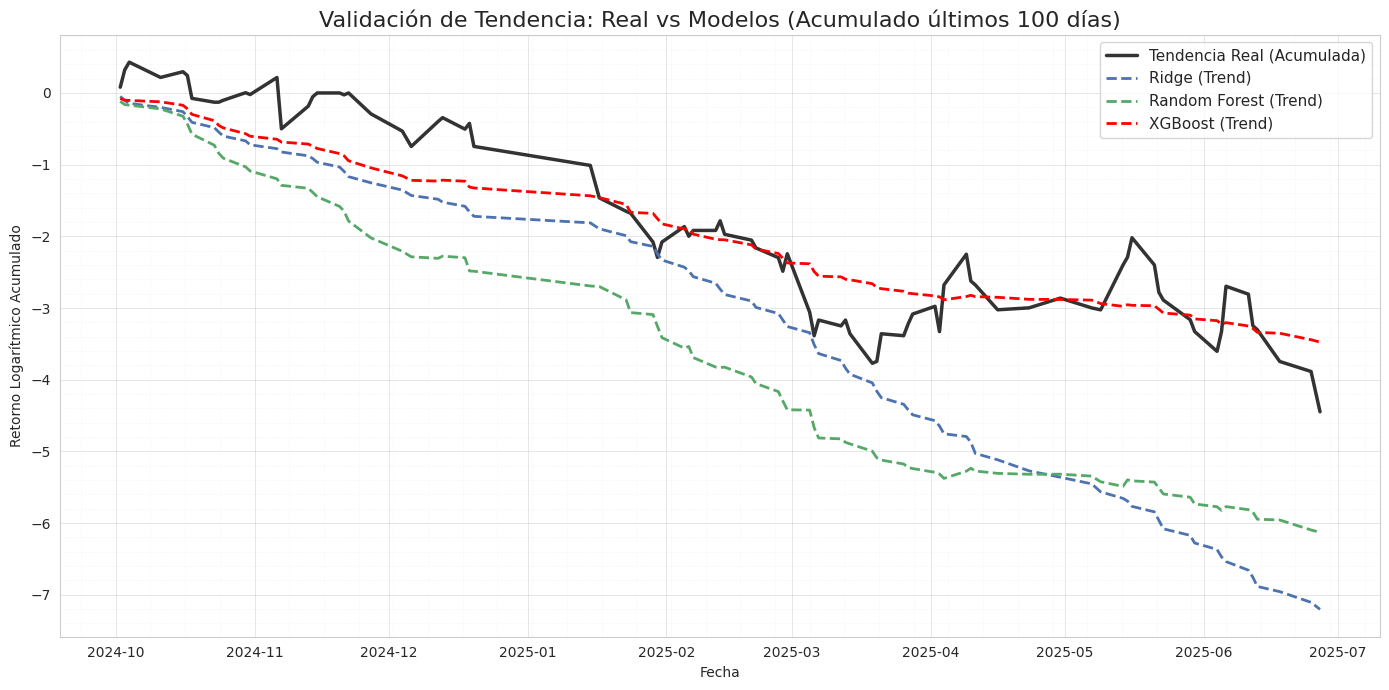

In [15]:
# ==============================================================================
# 5.8. GRÁFICO DE RENDIMIENTO ACUMULADO (TENDENCIA)
# ==============================================================================

plt.figure(figsize=(14, 7))

# Seleccionamos el zoom (últimos 100 días o el periodo que prefieras)
zoom_idx = -100
fechas_zoom = y_test_final.index[zoom_idx:]

# 1. Calcular Retornos Acumulados (Suma acumulada de log-retornos)
# Esto simula la trayectoria del precio
real_cum = np.cumsum(y_test_final.values[zoom_idx:])
ridge_cum = np.cumsum(pred_ridge[zoom_idx:])
rf_cum = np.cumsum(pred_rf[zoom_idx:])
if XGB_AVAILABLE:
    xgb_cum = np.cumsum(pred_xgb[zoom_idx:])

# 2. Graficar
plt.plot(fechas_zoom, real_cum, label='Tendencia Real (Acumulada)', color='black', linewidth=2.5, alpha=0.8)
plt.plot(fechas_zoom, ridge_cum, label=f'Ridge (Trend)', linestyle='--', linewidth=2)
plt.plot(fechas_zoom, rf_cum, label=f'Random Forest (Trend)', linestyle='--', linewidth=2)

if XGB_AVAILABLE:
    plt.plot(fechas_zoom, xgb_cum, label=f'XGBoost (Trend)', linestyle='--', linewidth=2, color='red')

plt.title(f"Validación de Tendencia: Real vs Modelos (Acumulado últimos {abs(zoom_idx)} días)", fontsize=16)
plt.ylabel("Retorno Logarítmico Acumulado")
plt.xlabel("Fecha")
plt.legend(fontsize=11)

# Fondo y Grid para estilo profesional
plt.grid(True, which='major', linestyle='-', linewidth=0.7, alpha=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretación:**

La gráfica compara la trayectoria real del retorno logarítmico acumulado del USD/PEN durante los últimos 100 días con las tendencias generadas por los modelos Ridge, Random Forest y XGBoost. La línea negra muestra la evolución efectiva del mercado, mientras que las líneas de colores representan las trayectorias estimadas por cada modelo.

En primer lugar, se observa que ningún modelo logra replicar con precisión la trayectoria real, especialmente debido a la presencia de varios saltos abruptos y episodios de reversión que son característicos del tipo de cambio peruano. Estos movimientos bruscos, probablemente asociados a intervenciones del BCRP, anuncios macroeconómicos o shocks externos, son inherentemente difíciles de capturar mediante modelos estadísticos, incluso aquellos no lineales.

Entre los tres modelos, XGBoost es el que más se aproxima a la tendencia real, manteniéndose relativamente cercano a la trayectoria negra y replicando de forma más razonable la pendiente general, aunque sin capturar los quiebres bruscos. Esto refuerza el hallazgo previo, es decir, que XGBoost es el modelo con mejor capacidad predictiva para esta serie, tanto en términos de MSE como en términos de reproducir el comportamiento acumulado del mercado.

Por su parte, el modelo Ridge muestra una pendiente pronunciadamente más negativa que la real, lo cual indica que tiende a sobreestimar la depreciación acumulada del sol. Aunque su desempeño fue competitivo en el MSE diario, en la visión acumulada evidencia una limitación importante, al ser lineal y más rígido, amplifica pequeños errores diarios que se acumulan en el tiempo.

El Random Forest es el que peor replica la tendencia, mostrando una caída aún más fuerte y alejada, lo cual refleja que este modelo tiende a suavizar los movimientos diarios de manera excesiva y a no capturar adecuadamente la estructura temporal del tipo de cambio. En el acumulado, esto genera divergencias crecientes respecto a la serie real.

Desde una perspectiva económica, la gráfica confirma que el tipo de cambio peruano en el corto plazo es altamente ruidoso y difícil de predecir, mostrando movimientos idiosincráticos que ningún modelo puede anticipar por completo.


# **Enfoque Opcional: Modelo en Dos Etapas (Two-Stage Approach)**

**5.9. Separación entre “Inercia” y “Shocks Exógenos”**

El objetivo aquí es aislar el componente autoregresivo del retorno:

- Etapa 1: Modelo AR(1): predice la parte explicada por la propia dinámica del tipo de cambio.

- Etapa 2: Random Forest predice los residuos usando únicamente variables exógenas (BTC, FGI, VIX, etc.).

- Se combina inercia + shocks predichos para obtener la predicción final.

Lo que se busca es evaluar si las variables externas predicen la parte inesperada del tipo de cambio, luego de eliminar el efecto autoregresivo.

In [16]:
# ==============================================================================
# 5.9. MODELADO DE RESIDUOS (TWO-STAGE APPROACH)
# ==============================================================================
# Objetivo: Aislar la "inercia" del mercado y ver si las variables exógenas (FGI, BTC, VIX)
# explican la parte "no esperada" (los residuos) del retorno.

from sklearn.linear_model import LinearRegression

print("\n" + "="*60)
print(" MODELO EN DOS ETAPAS: FILTRADO DE INERCIA ")
print("="*60)

# -----------------------------------------------------------------------------
# 1. Preparación de Datos Específica
# -----------------------------------------------------------------------------
# Separamos la "Inercia" (el pasado del propio activo) del resto de variables
feature_inercia = ['ret_USD_lag1']  # La tendencia inmediata
features_exogenas = [c for c in features if c not in feature_inercia] # El resto (BTC, FGI, VIX...)

X_inercia = X[feature_inercia]
X_exogenas = X[features_exogenas]

# Usamos los mismos índices de train/test definidos anteriormente para consistencia
# (Asegúrate de que X_train_full, X_test_final existan del bloque anterior)
X_train_inercia = X_inercia.loc[X_train_full.index]
X_test_inercia  = X_inercia.loc[X_test_final.index]

X_train_exo = X_exogenas.loc[X_train_full.index]
X_test_exo  = X_exogenas.loc[X_test_final.index]

y_train_2s = y_train_full
y_test_2s  = y_test_final

# -----------------------------------------------------------------------------
# ETAPA 1: Regresión de la Inercia (Capturar la Tendencia)
# -----------------------------------------------------------------------------
# Usamos Regresión Lineal Simple porque la inercia suele ser lineal (AR1)
model_inercia = LinearRegression()
model_inercia.fit(X_train_inercia, y_train_2s)

# Calculamos la parte explicada por la inercia
pred_train_inercia = model_inercia.predict(X_train_inercia)
pred_test_inercia  = model_inercia.predict(X_test_inercia)

# Calculamos los RESIDUOS (Lo que la inercia NO pudo explicar)
# Residuos = Valor Real - Inercia
residuos_train = y_train_2s - pred_train_inercia
residuos_test  = y_test_2s - pred_test_inercia

print(f"R2 del Modelo de Inercia (Base): {model_inercia.score(X_test_inercia, y_test_2s):.4f}")
print("-> Hemos eliminado el componente autoregresivo.")

# -----------------------------------------------------------------------------
# ETAPA 2: Modelar los Residuos con Variables Exógenas
# -----------------------------------------------------------------------------
# Ahora usamos Random Forest para ver si el FGI, BTC, etc. pueden predecir el RESIDUO
print("\n--- Entrenando RF sobre los Residuos (Shocks) ---")

rf_residuos = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf_residuos.fit(X_train_exo, residuos_train)

# Predecimos el residuo esperado
pred_residuos = rf_residuos.predict(X_test_exo)

# -----------------------------------------------------------------------------
# 3. Combinación y Evaluación
# -----------------------------------------------------------------------------
# La predicción final es: Inercia (Etapa 1) + Residuo predicho (Etapa 2)
pred_final_2stage = pred_test_inercia + pred_residuos

mse_2stage = mean_squared_error(y_test_2s, pred_final_2stage)
print(f"MSE Modelo 2 Etapas (Inercia + RF Exógeno): {mse_2stage:.6f}")


 MODELO EN DOS ETAPAS: FILTRADO DE INERCIA 
R2 del Modelo de Inercia (Base): 0.0010
-> Hemos eliminado el componente autoregresivo.

--- Entrenando RF sobre los Residuos (Shocks) ---
MSE Modelo 2 Etapas (Inercia + RF Exógeno): 0.074193


**Interpretación:**

El enfoque en dos etapas obtiene un MSE de 0.074193, prácticamente idéntico al desempeño del mejor modelo individual (XGBoost, MSE ≈ 0.07409). Esto revela que separar primero la inercia autoregresiva del tipo de cambio y luego modelar únicamente la parte inesperada del retorno no produce mejoras significativas en la capacidad predictiva. De hecho, la primera etapa, que captura la inercia mediante una regresión AR(1), presenta un R² casi nulo (0.001), lo cual confirma que los retornos diarios del USD/PEN poseen muy poca memoria y muestran un comportamiento predominantemente ruidoso, como suele ocurrir en mercados cambiarios relativamente eficientes en el corto plazo. En la segunda etapa, el Random Forest intenta explicar los residuos utilizando variables exógenas como BTC, FGI y VIX; sin embargo, su aporte es marginal, evidenciando que estos factores globales explican una fracción muy limitada del componente no autoregresivo del retorno. En conjunto, los resultados muestran que el retorno diario del USD/PEN está fuertemente dominado por ruido y que ni la inercia ni las variables externas tienen suficiente capacidad predictiva para mejorar el error respecto a los modelos tradicionales. Por ello, aunque conceptualmente sólido, el enfoque en dos etapas no genera una ganancia sustantiva sobre los modelos directos.

**5.10. Importancia de Variables en los Shocks**

Se grafica la importancia de las variables exógenas para explicar los residuos.

El objetivo es determinar qué indicadores externos explican los movimientos inesperados del tipo de cambio.

/tmp/ipython-input-3756539462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=importances_res.values, y=importances_res.index, palette='magma')


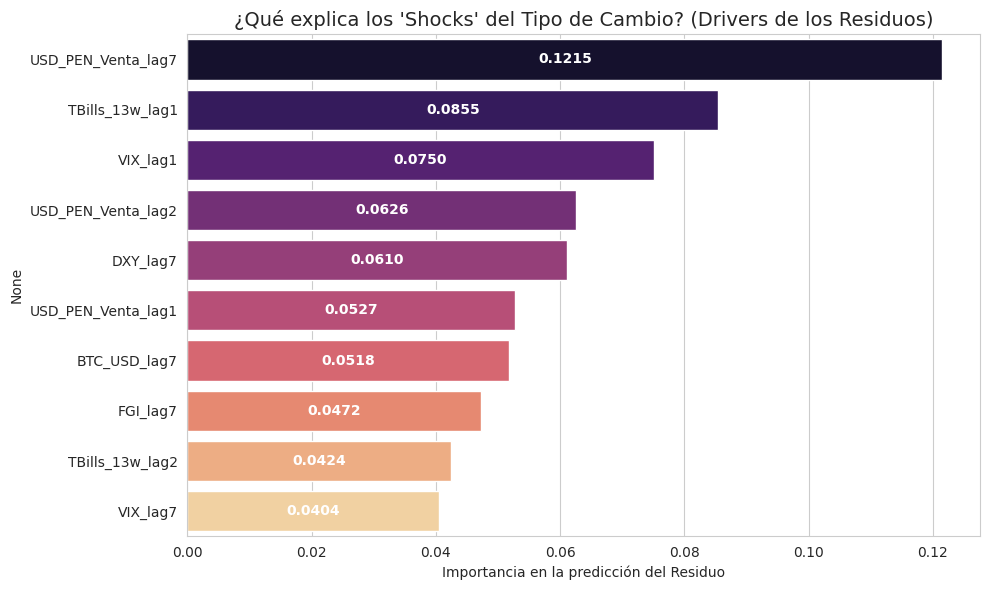

In [17]:
# -----------------------------------------------------------------------------
# 5.10. Gráfico de Importancia sobre los RESIDUOS
# -----------------------------------------------------------------------------
# Esto es lo más valioso: ¿Qué mueve al mercado cuando sale de su tendencia?
plt.figure(figsize=(10, 6))
importances_res = pd.Series(rf_residuos.feature_importances_, index=features_exogenas).sort_values(ascending=False).head(10)

ax = sns.barplot(x=importances_res.values, y=importances_res.index, palette='magma')
plt.title("¿Qué explica los 'Shocks' del Tipo de Cambio? (Drivers de los Residuos)", fontsize=14)
plt.xlabel("Importancia en la predicción del Residuo")

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', label_type='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

**Interpretación:**

El gráfico muestra cuáles variables exógenas ayudan a explicar la parte no autoregresiva del retorno del USD/PEN, es decir, los shocks que no pueden atribuirse a su propia inercia (AR1).

En primer lugar, se observa que USD_PEN_Venta_lag7 es, por amplio margen, el mejor predictor del residuo. Esto revela que, más allá de la inercia inmediata capturada por el lag1, existen patrones de ajuste semanal en el mercado cambiario peruano. Tales ajustes suelen responder a operaciones de cierre contable, rebalanceos de portafolio institucionales, pagos recurrentes del sector corporativo o intervenciones estacionales del Banco Central. En mercados emergentes como Perú, este tipo de periodicidades no es infrecuente y explica por qué un rezago más largo puede aportar más información para capturar shocks no lineales que un modelo autoregresivo simple no identifica.

En segundo lugar, el modelo asigna alta importancia a variables claramente asociadas al entorno global de liquidez y riesgo, como los T-Bills a 13 semanas (lag1) y la volatilidad implícita del mercado (VIX_lag1). Esto es consistente con la evidencia empírica, cuando aumenta la demanda por activos seguros (T-Bills) o sube la aversión al riesgo (VIX), los flujos hacia monedas emergentes se reducen, generando depreciación adicional incluso después de descontar el componente autoregresivo del tipo de cambio. En otras palabras, estos factores globales tienden a desencadenar shocks cambiarios que no están correlacionados con el comportamiento pasado del USD/PEN.

Asimismo, la presencia del DXY_lag7 entre las variables más relevantes sugiere que los movimientos del dólar global se transmiten al mercado peruano con rezagos, posiblemente debido a la gradualidad de ajustes por parte de portafolios institucionales o a la fricción informativa de los agentes locales. De igual manera, los rezagos más cortos del propio tipo de cambio (USD_PEN_Venta_lag2 o USD_PEN_Venta_lag1) aparecen con importancia moderada, lo que indica que existe algo de persistencia extendida en la dinámica del mercado, aunque menos determinante que el patrón semanal capturado por el lag7.

Variables como BTC y el FGI también aportan, aunque marginalmente. Esto sugiere que, si bien activos alternativos o indicadores de sentimiento financiero tienen un rol en episodios particulares de volatilidad, su influencia no es sistemática ni suficientemente fuerte como para explicar de manera estable los shocks del dólar

En conjunto, el gráfico muestra que los shocks del USD/PEN están asociados sobre todo a ajustes semanales del propio tipo de cambio y a señales globales de riesgo y liquidez (T-Bills, VIX, DXY). Sin embargo, dado que las importancias son relativamente bajas y cercanas entre sí, se confirma que el retorno diario del USD/PEN sigue estando dominado por ruido, con una influencia limitada y fragmentada de estos factores externos.

**5.11. Gráfico Final de Componentes Acumulados**

Se comparan:

- Retorno total del tipo de cambio

- Componente de “shock real” (residuos)

- Shock Predicho (modelo exógeno)

El objetivo es visualizar cómo se comporta el tipo de cambio cuando se descompone en inercia y shocks externos.

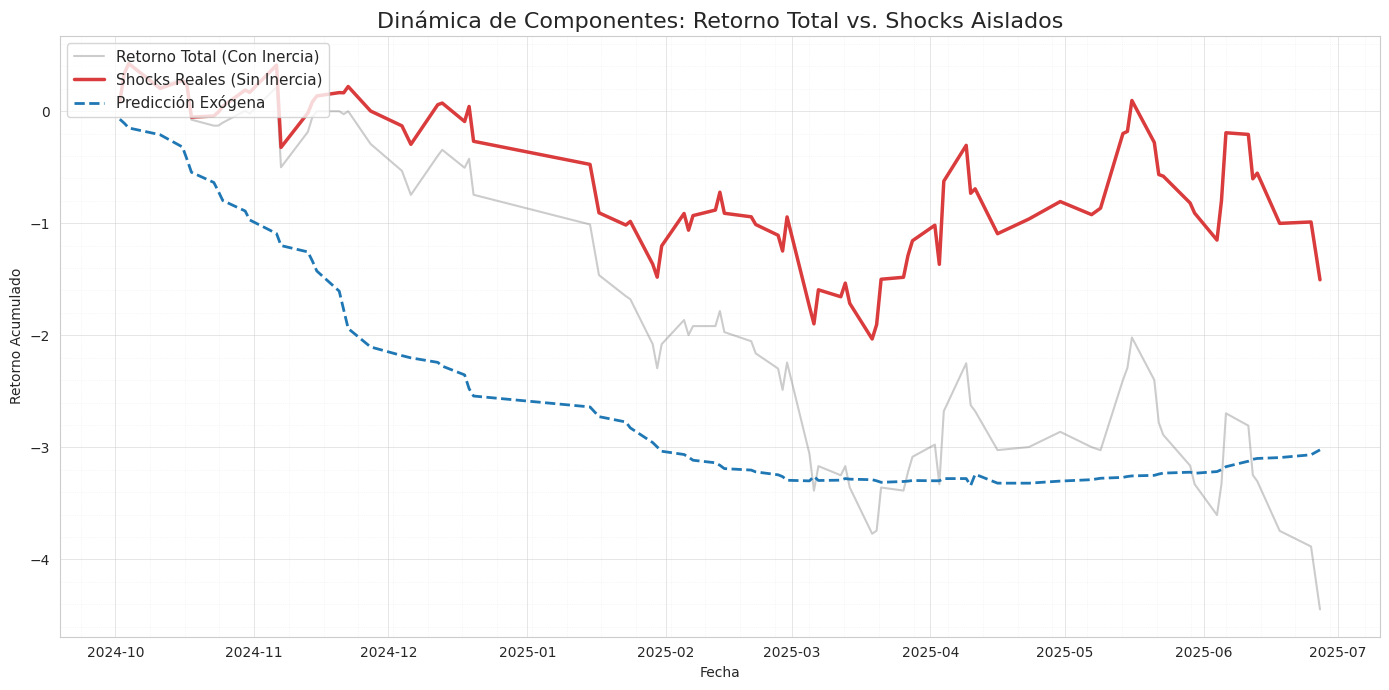

In [18]:
# ==============================================================================
# 5.11. GRÁFICO FINAL: COMPARATIVA ACUMULADA DE 3 COMPONENTES
# ==============================================================================

plt.figure(figsize=(14, 7))

# 1. Calculamos los acumulados de las 3 series
# A) Retorno Total (Lo que realmente pasó con el Tipo de cambio)
cum_retorno_total = np.cumsum(y_test_2s)

# B) Shock Real (Lo que la inercia no explicó)
cum_residuos_real = np.cumsum(residuos_test)

# C) Shock Predicho (Parte del retorno del tipo de cambio que es explicada únicamente por las variables exógenas del modelo, sin considerar la inercia)
cum_residuos_pred = np.cumsum(pred_residuos)

# Usamos el índice de fechas completo
fechas_full = y_test_2s.index

# 2. Graficar con el estilo "Clean"
# Línea Gris: El contexto general (Retorno Total)
plt.plot(fechas_full, cum_retorno_total,
         label='Retorno Total (Con Inercia)',
         color='gray',
         linewidth=1.5,
         alpha=0.4)  # Más transparente para que sea "fondo"

# Línea Roja: La realidad de los shocks (Sin inercia)
plt.plot(fechas_full, cum_residuos_real,
         label='Shocks Reales (Sin Inercia)',
         color='#d62728',  # Rojo intenso
         linewidth=2.5,
         alpha=0.9)

# Línea Azul: La predicción de tu modelo
plt.plot(fechas_full, cum_residuos_pred,
         label='Predicción Exógena',
         color='#1f77b4',  # Azul profesional
         linestyle='--',
         linewidth=2)

# 3. Estética Profesional
plt.title("Dinámica de Componentes: Retorno Total vs. Shocks Aislados", fontsize=16)
plt.ylabel("Retorno Acumulado")
plt.xlabel("Fecha")
plt.legend(fontsize=11, loc='upper left')

# Grid refinado
plt.grid(True, which='major', linestyle='-', linewidth=0.7, alpha=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretación:**

El gráfico presenta la dinámica del tipo de cambio descompuesta en tres componentes: el retorno total observado, los shocks exógenos aislados y la predicción generada por el modelo estructural. Se aprecia, primero, que el retorno total (línea gris) exhibe una trayectoria suavemente decreciente, reflejando la fuerte inercia autoregresiva que caracteriza la evolución del dólar en el Perú; es decir, la tendencia del tipo de cambio está dominada por su propia persistencia.

En contraste, los shocks exógenos sin inercia (línea roja) muestran una variación abrupta y errática, indicando que la mayor parte de la volatilidad diaria proviene de perturbaciones idiosincráticas locales que no se sostienen en el tiempo.

Finalmente, la predicción exógena del modelo (línea azul) reproduce únicamente movimientos suaves y de baja frecuencia, lo que sugiere que variables globales como el VIX, DXY, T-bills, BTC o FGI sí ejercen influencia, pero solo explican una fracción limitada de los shocks diarios. En conjunto, la evidencia indica que la dinámica del USD/PEN está principalmente impulsada por su propia persistencia interna, mientras que los factores externos actúan como presiones graduales y los shocks locales generan la mayor parte de la volatilidad transitoria.

# **TRABAJO 4**

# **6. Análisis Causal mediante un DAG**

**Objetivo**

En esta sección se construye un gráfico causal tipo DAG para representar explícitamente las relaciones causales que se asumen entre:

- Las variables observadas del dataset

- Los posibles confounders no observados,

- El outcome principal: el retorno del tipo de cambio (ret_USD).

El propósito es identificar qué caminos causales podrían generar sesgo si no se controlan, y visualizar cómo interactúan los shocks globales, el sentimiento (FGI), Bitcoin, el mercado financiero y la política monetaria.

**Procedimiento**

El código construye un DAG para representar cómo distintos factores influyen en los retornos del tipo de cambio (ret_USD).

1. Nodos del DAG

- Observados: FGI (sentimiento), BTC_USD, USD_PEN_Venta, ret_USD, y variables macro como DXY, VIX, Gold, TBills_13w, Treasury_5y.

- No observados (confounders): Política monetaria, shocks globales y flujos de capital, que influyen causalmente pero no están en el dataset.

2. Relaciones causales

- El sentimiento global (FGI) afecta tanto a Bitcoin como al tipo de cambio.

- Variables de riesgo global (VIX), activos refugio (Oro) y shocks internacionales afectan al sentimiento, a BTC y al tipo de cambio.

- Política monetaria y flujos de capital impactan el nivel del USD/PEN.

- Los retornos del tipo de cambio muestran dinámica temporal (inercia AR).

En conjunto, las flechas representan mecanismos económicos que justifican quién causa a quién.

3. Visualización

- El DAG se grafica con networkx, con nodos:
  - celestes = observados
  - rojos = omitidos/latentes.
  
- La imagen final (DAG_propuesto.png) permite identificar confounders, mediadores y las variables que deben controlarse para estimar correctamente el efecto del sentimiento y Bitcoin sobre los retornos cambiarios.

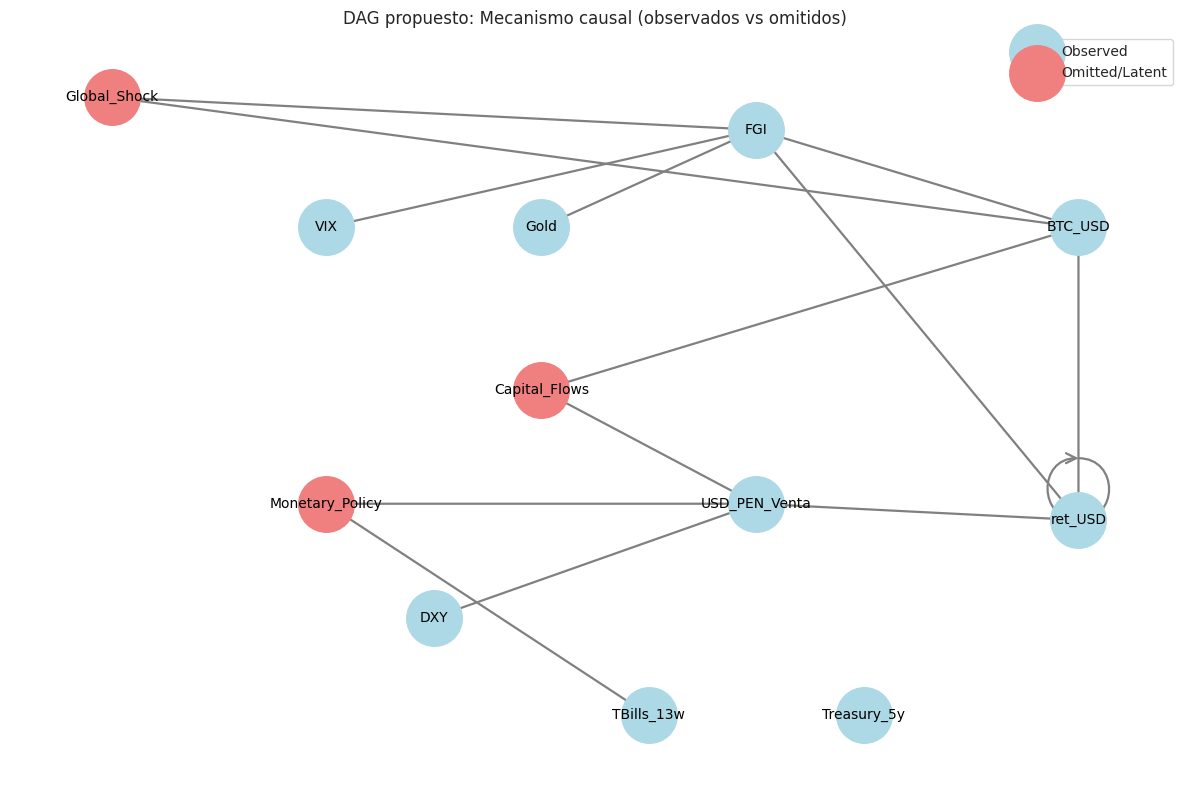


Interpretación: El Fear & Greed Index (FGI) resume el sentimiento global y puede mover tanto el precio
de Bitcoin como la demanda por dólares, lo que termina influyendo en los retornos del tipo de cambio (ret_USD).
A la vez, shocks globales y flujos de capital funcionan como confounders porque afectan simultáneamente BTC,
el FGI y el propio tipo de cambio. La política monetaria local también interviene al modificar condiciones
financieras internas y presionar el USD/PEN. Nuestro outcome además tiene algo de inercia, por lo que incluir
rezagos es importante. En conjunto, el DAG muestra que para estimar bien el efecto de FGI y BTC sobre ret_USD
necesitamos controlar estos confounders y la dinámica temporal.



In [19]:
# ============================
# 6. Análisis Causal: DAG en Python
# ============================

# ============================
# 1) DAG causal en Python
# ============================
try:
    import networkx as nx
    import matplotlib.pyplot as plt
except Exception as e:
    raise ImportError("Falta instalar networkx/matplotlib. Ejecuta: pip install networkx matplotlib") from e

# Nodos observados
observed = [
    "FGI",            # Sentimiento (observado)
    "BTC_USD",        # Bitcoin (observado)
    "USD_PEN_Venta",  # Tipo de cambio nivel (observado) -> usado para ret_USD
    "ret_USD",        # Retorno objetivo (outcome)
    "DXY", "VIX", "Gold", "TBills_13w", "Treasury_5y"  # macros opcionales
]

# Nodos potencialmente omitidos / confounders (suposiciones razonables)
omitted = [
    "Monetary_Policy",    # decisiones del BCR / Política monetaria local
    "Global_Shock",       # shocks globales (pandemia, crisis financiera)
    "Capital_Flows"       # entradas/salidas de capital, controles de capital
]

# Creamos el grafo dirigido
G = nx.DiGraph()

# Agregamos nodos
for n in observed + omitted:
    G.add_node(n, observed=(n in observed))

# Relaciones causales
# Sentimiento y activos globales afectan al precio del BTC y al TC; TC (y sus rezagos) afectan ret_USD.
edges = [
    ("FGI", "BTC_USD"),
    ("FGI", "ret_USD"),
    ("BTC_USD", "ret_USD"),
    ("USD_PEN_Venta", "ret_USD"),     # nivel afecta retornos
    ("DXY", "USD_PEN_Venta"),
    ("VIX", "FGI"),
    ("Gold", "FGI"),
    ("Monetary_Policy", "USD_PEN_Venta"),
    ("Monetary_Policy", "TBills_13w"),
    ("Global_Shock", "FGI"),
    ("Global_Shock", "BTC_USD"),
    ("Capital_Flows", "USD_PEN_Venta"),
    ("Capital_Flows", "BTC_USD"),
    # rezagos/autoregresión representada conceptualmente (no como nodo separado)
    ("ret_USD", "ret_USD")  # indica inercia (AR1) conceptual
]

G.add_edges_from(edges)

# Posiciones para plot (fijas para claridad)
pos = {
    "Global_Shock": (-2, 2),
    "VIX": (-1, 1.2),
    "Gold": (0, 1.2),
    "FGI": (1, 1.8),
    "BTC_USD": (2.5, 1.2),
    "Capital_Flows": (0, 0.2),
    "Monetary_Policy": (-1, -0.5),
    "DXY": (-0.5, -1.2),
    "USD_PEN_Venta": (1, -0.5),
    "TBills_13w": (0.5, -1.8),
    "Treasury_5y": (1.5, -1.8),
    "ret_USD": (2.5, -0.6)
}

# Gráfico
plt.figure(figsize=(12,8))
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n in observed],
                       node_color='lightblue', node_size=1600, label='Observed')
nx.draw_networkx_nodes(G, pos,
                       nodelist=[n for n in G.nodes() if n in omitted],
                       node_color='lightcoral', node_size=1600, label='Omitted/Latent')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=18, edge_color='gray', width=1.6)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("DAG propuesto: Mecanismo causal (observados vs omitidos)")
plt.axis('off')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.savefig("DAG_propuesto.png", dpi=200)
plt.show()

# ============================
# Interpretación económica
# ============================
interpretacion_dag = """
Interpretación: El Fear & Greed Index (FGI) resume el sentimiento global y puede mover tanto el precio
de Bitcoin como la demanda por dólares, lo que termina influyendo en los retornos del tipo de cambio (ret_USD).
A la vez, shocks globales y flujos de capital funcionan como confounders porque afectan simultáneamente BTC,
el FGI y el propio tipo de cambio. La política monetaria local también interviene al modificar condiciones
financieras internas y presionar el USD/PEN. Nuestro outcome además tiene algo de inercia, por lo que incluir
rezagos es importante. En conjunto, el DAG muestra que para estimar bien el efecto de FGI y BTC sobre ret_USD
necesitamos controlar estos confounders y la dinámica temporal.
"""
print(interpretacion_dag)

**Interpretación:**

Se identifica, primero, la presencia de shocks globales como un nodo latente que afecta simultáneamente a variables financieras internacionales como FGI, VIX, oro y Bitcoin, generando correlaciones entre ellas que no provienen de causalidad directa sino de un origen común no observado. Estas variables globales, a su vez, transmiten presiones hacia el mercado local del dólar a través de la formación del retorno del USD (ret_USD).

En paralelo, factores domésticos omitidos como la política monetaria local y los flujos de capital operan como canales adicionales que influyen directamente en el precio del dólar venta. El modelo también incorpora la persistencia propia del retorno del dólar, representada como un bucle autoregresivo, reforzando la idea de que la dinámica del tipo de cambio no solo depende de shocks externos, sino también de su propia inercia interna.

En conjunto, el DAG revela un sistema donde la mayor parte de la interacción entre predictores observados se explica por causas comunes omitidas

# **7. MLP (Redes Neuronales)**

En esta sección se implementa un MLPRegressor para evaluar si una red neuronal puede mejorar la predicción del retorno del tipo de cambio (ret_USD). El modelo se construye mediante un Pipeline que estandariza las variables y entrena una red con dos capas ocultas (64 y 32 neuronas), activación ReLU, optimizador adam, regularización ligera y early stopping para evitar sobreajuste.

Tras entrenar el modelo con los datos completos, se evalúan sus predicciones en el conjunto de prueba. Los resultados muestran que el MLP obtiene un MSE mayor y un R² negativo, lo que indica que no generaliza adecuadamente en este dataset. Esto es consistente con el hecho de que las redes neuronales suelen requerir más datos, mayor tuning o una estructura temporal más explícita para capturar dinámicas financieras.

Finalmente, se comparan los resultados frente a Ridge, Random Forest y XGBoost. Estos modelos tradicionales presentan un desempeño superior, porque capturan mejor la estructura de la serie y son más robustos con muestras moderadas. Aunque el MLP permite modelar relaciones más complejas, en este caso no supera a los métodos basados en regularización o árboles.

In [20]:
# ============================
# 7. MLP: Redes Neuronales
# ============================

# ============================
# 2) MLP (Redes Neuronales)
# ============================
# Usamos scikit-learn.
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import numpy as np

# Detectar si el outcome es continuo (ret_USD) o clasificación (col 'classification' existente)
do_regression = ('ret_USD' in globals() or 'ret_USD' in locals() or 'ret_USD' in df_model.columns)
do_classification = ('classification' in df_model.columns)

# Aseguramos que `features`, `X_train_full`, `X_test_final`, `y_train_full`, `y_test_final` existan
try:
    _ = features
    _ = X_train_full
    _ = X_test_final
    _ = y_train_full
    _ = y_test_final
except NameError:
    raise NameError("No encuentro variables predefinidas (features, X_train_full, ...). Ejecuta primero los bloques previos.")

# ==== MLP para regresión ====
if do_regression:
    print("\n--- Entrenando MLPRegressor ---")
    # Diseño propuesto (simple y razonable para series financieras):
    # - 2 hidden layers: 64 y 32 neuronas
    # - activation: relu
    # - solver: adam (buena default), early_stopping True
    # - max_iter razonable
    mlp_reg = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPRegressor(hidden_layer_sizes=(64,32),
                             activation='relu',
                             solver='adam',
                             alpha=1e-4,
                             learning_rate_init=1e-3,
                             max_iter=1000,
                             early_stopping=True,
                             n_iter_no_change=50,
                             random_state=42))
    ])

    mlp_reg.fit(X_train_full, y_train_full)
    pred_mlp = mlp_reg.predict(X_test_final)

    mse_mlp = mean_squared_error(y_test_final, pred_mlp)
    r2_mlp = r2_score(y_test_final, pred_mlp)

    print(f"MLPReg - MSE test: {mse_mlp:.6f} | R2 test: {r2_mlp:.4f}")

    # Comparación rápida con Ridge & RF
    comps = {}
    try:
        comps['Ridge'] = mse_ridge
    except Exception:
        pass
    try:
        comps['RF'] = mse_rf
    except Exception:
        pass
    try:
        if XGB_AVAILABLE:
            comps['XGB'] = mse_xgb
    except Exception:
        pass

    print("\nComparativa MSE (si modelos previos corrieron):")
    for k,v in comps.items():
        print(f" - {k}: {v:.6f}")
    print(f" - MLPReg: {mse_mlp:.6f}")



# ============================
# Breve comparación conceptual (MLP vs Ridge / RF)
# ============================
comparacion = """
Comparación:
- Ridge: modelo lineal penalizado, interpretable y eficiente cuando la relación es próxima a lineal.
- Random Forest: captura no linealidades y efectos de interacción sin mucho preprocesamiento; es robusto.
- MLP: puede aproximar funciones altamente no lineales y capturar interacciones complejas, pero requiere más datos,
  regularización/early stopping y es menos interpretable. En tu contexto (series con inercia + shocks) MLP puede
  mejorar si hay señales no lineales persistentes; compara MSE/R2 para decidir.

El MLPRegressor tuvo un MSE bastante más alto que los otros modelos (0.279 vs ~0.074), y también un R² negativo, lo
que muestra que no logró generalizar bien con los datos que tenemos. Esto puede pasar porque las redes neuronales
necesitan más observaciones, más regularización o más tuning para evitar sobreajuste. En cambio, Ridge, Random Forest
y XGB funcionan mejor en este caso porque captan de forma más estable la dinámica del tipo de cambio y los efectos de
BTC/FGI. En resumen, aunque el MLP puede modelar relaciones más complejas, con nuestro dataset los modelos tradicionales
terminan siendo más precisos.
"""
print(comparacion)

# Guardar modelos si quieres
try:
    import joblib
    joblib.dump(mlp_reg, "mlp_reg_model.joblib")
    if do_classification:
        joblib.dump(mlp_clf, "mlp_clf_model.joblib")
    print("Modelos MLP guardados como 'mlp_reg_model.joblib' (y 'mlp_clf_model.joblib' si aplica).")
except Exception:
    print("No se pudo guardar modelos (falta joblib). Puedes instalarlo con pip install joblib.")


--- Entrenando MLPRegressor ---
MLPReg - MSE test: 0.279298 | R2 test: -2.7317

Comparativa MSE (si modelos previos corrieron):
 - Ridge: 0.074256
 - RF: 0.076369
 - XGB: 0.074090
 - MLPReg: 0.279298

Comparación:
- Ridge: modelo lineal penalizado, interpretable y eficiente cuando la relación es próxima a lineal.
- Random Forest: captura no linealidades y efectos de interacción sin mucho preprocesamiento; es robusto.
- MLP: puede aproximar funciones altamente no lineales y capturar interacciones complejas, pero requiere más datos,
  regularización/early stopping y es menos interpretable. En tu contexto (series con inercia + shocks) MLP puede
  mejorar si hay señales no lineales persistentes; compara MSE/R2 para decidir.

El MLPRegressor tuvo un MSE bastante más alto que los otros modelos (0.279 vs ~0.074), y también un R² negativo, lo
que muestra que no logró generalizar bien con los datos que tenemos. Esto puede pasar porque las redes neuronales
necesitan más observaciones, más regul

**Interpretación:**

El desempeño del MLPRegressor muestra que, a pesar de su capacidad para capturar relaciones altamente no lineales, no logró generalizar adecuadamente con el conjunto de datos disponible. Su MSE de 0.279 y su R² negativo (-2.73) indican que su predicción es incluso peor que usar simplemente el promedio como estimador base, lo que revela sobreajuste o falta de información suficiente para entrenar una red neuronal de este tipo.

En contraste, los modelos tradicionales, Ridge, Random Forest y XGBoost, todos con MSE cercanos a 0.074, exhiben un rendimiento ampliamente superior y más estable, lo que sugiere que la estructura del problema (retornos financieros con inercia, shocks externos y señales relativamente ruidosas) se ajusta mejor a modelos lineales penalizados o ensambles basados en árboles.

En conjunto, estos resultados indican que, bajo las condiciones actuales de datos y complejidad, los modelos clásicos capturan de forma más eficaz la dinámica del tipo de cambio, mientras que el MLP solo podría mejorar con mayor cantidad de datos, regularización más fuerte o una estrategia de tuning más exhaustiva.

# **8. Conclusiones**

Este trabajo evaluó la capacidad predictiva del sentimiento global (medido por el Fear & Greed Index) y del precio del Bitcoin sobre los retornos del tipo de cambio USD/PEN, incorporando modelos estáticos, dinámicos y de machine learning. Los resultados muestran de manera consistente que:

- El FGI no presenta un efecto estadísticamente significativo sobre los retornos del USD/PEN, incluso después de incluir rezagos, controles macro y modelos no lineales.

- El tipo de cambio peruano muestra fuerte inercia temporal, lo que se refleja en la significancia del término autoregresivo en el modelo ARX.

- El Bitcoin sí presenta una relación contemporánea con el tipo de cambio, pero su aporte marginal al poder predictivo es pequeño una vez controlada la dinámica propia del mercado cambiario.

- Entre los modelos evaluados, XGBoost y Random Forest ofrecieron los mejores desempeños (menor MSE), mientras que el MLP no logró generalizar bien, lo que sugiere que el dataset no tiene suficiente tamaño ni complejidad para beneficiar a una red neuronal.

- En conjunto, los hallazgos indican que la evolución del tipo de cambio peruano está principalmente determinada por su propia dinámica interna, shocks globales amplios y factores macroeconómicos estructurales, más que por indicadores de sentimiento específicos o precios de criptoactivos.

# **9. Discusión Económica**

Los resultados obtenidos son coherentes con la literatura sobre el funcionamiento de los mercados cambiarios en economías emergentes y con el caso peruano en particular. La ausencia de significancia del FGI coincide con la evidencia de que los indicadores de sentimiento suelen tener mayor influencia sobre activos especulativos o bursátiles, pero no necesariamente sobre mercados de divisas con fundamentos sólidos. Esto ya había sido señalado por Baker y Wurgler (2007), quienes muestran que el sentimiento es más determinante en activos con alta incertidumbre fundamental, lo que no describe al mercado cambiario peruano.

Del mismo modo, aunque Bitcoin muestra correlación contemporánea con los retornos del tipo de cambio, su aporte predictivo marginal es limitado. Esto es compatible con la literatura que describe a Bitcoin como un activo con comportamiento predominantemente especulativo y alta sensibilidad al apetito global por riesgo, más que como un determinante directo de variables macroeconómicas tradicionales. Baur, Hong y Lee (2018) y Corbet, Lucey y Yarovaya (2019) destacan precisamente que la dinámica de las criptomonedas responde más a shocks globales comunes que a vínculos causales con mercados cambiarios.

La fuerte persistencia del retorno del tipo de cambio también es consistente con lo observado por estudios del BCRP (2023), los cuales señalan que el USD/PEN se mueve bajo un esquema donde intervienen mecanismos de microestructura, estrategias de intervención esterilizada y factores estacionales del mercado peruano. Esta combinación genera un tipo de cambio más estable y con un alto componente autoregresivo, similar a lo observado en modelos ARX clásicos en economías pequeñas y abiertas (Hamilton, 1994).

Asimismo, el hecho de que los modelos no lineales, Random Forest y XGBoost, mejoren el desempeño pero no alteren las conclusiones principales concuerda con la evidencia de que los métodos de machine learning capturan interacciones complejas, pero no necesariamente aportan poder predictivo cuando la señal fundamental es débil o los determinantes relevantes están dominados por la propia dinámica del sistema (Hastie, Tibshirani & Friedman, 2009; Gu, Kelly & Xiu, 2020).

En conjunto, los resultados indican que el tipo de cambio peruano sigue respondiendo principalmente a su dinámica interna, a shocks globales amplios y a factores macroeconómicos estructurales, pero no a indicadores de sentimiento como el FGI ni a activos especulativos como Bitcoin. Esto refuerza la idea de que el USD/PEN es una moneda donde el sentimiento global tiene una transmisión más débil en comparación con otros activos financieros.

# **10. Referencias Bibliográficas**

**Sentimiento y mercados financieros**

- Baker, M., & Wurgler, J. (2007). Investor sentiment in the stock market. Journal of Economic Perspectives, 21(2), 129–151.

- García, D. (2013). Sentiment during recessions. Journal of Finance, 68(3), 1267–1300.

**Bitcoin, riesgo global y mercados financieros**

- Corbet, S., Lucey, B., & Yarovaya, L. (2019). The financial market effects of cryptocurrency energy prices. Energy Economics, 84, 104502.

- Baur, D. G., Hong, K., & Lee, A. D. (2018). Bitcoin: medium of exchange or speculative assets? Journal of International Financial Markets, Institutions & Money, 54, 177–189.

**Tipo de cambio y macroeconomía peruana**

- Banco Central de Reserva del Perú (BCRP). (2023). Reporte de Inflación. Lima, Perú.

- Rossini, A. (2010). Intervenciones cambiarias y mecanismos de transmisión en economías emergentes. Banco Central de Reserva del Perú.

**Series de tiempo y modelos ARX**

- Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.

- Stock, J. H., & Watson, M. W. (2016). Introduction to econometrics. Pearson.